In [2]:
import nd_rust as nd_r
import nd_python as nd_p 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json

### Figuring out whats going on with degree of networks

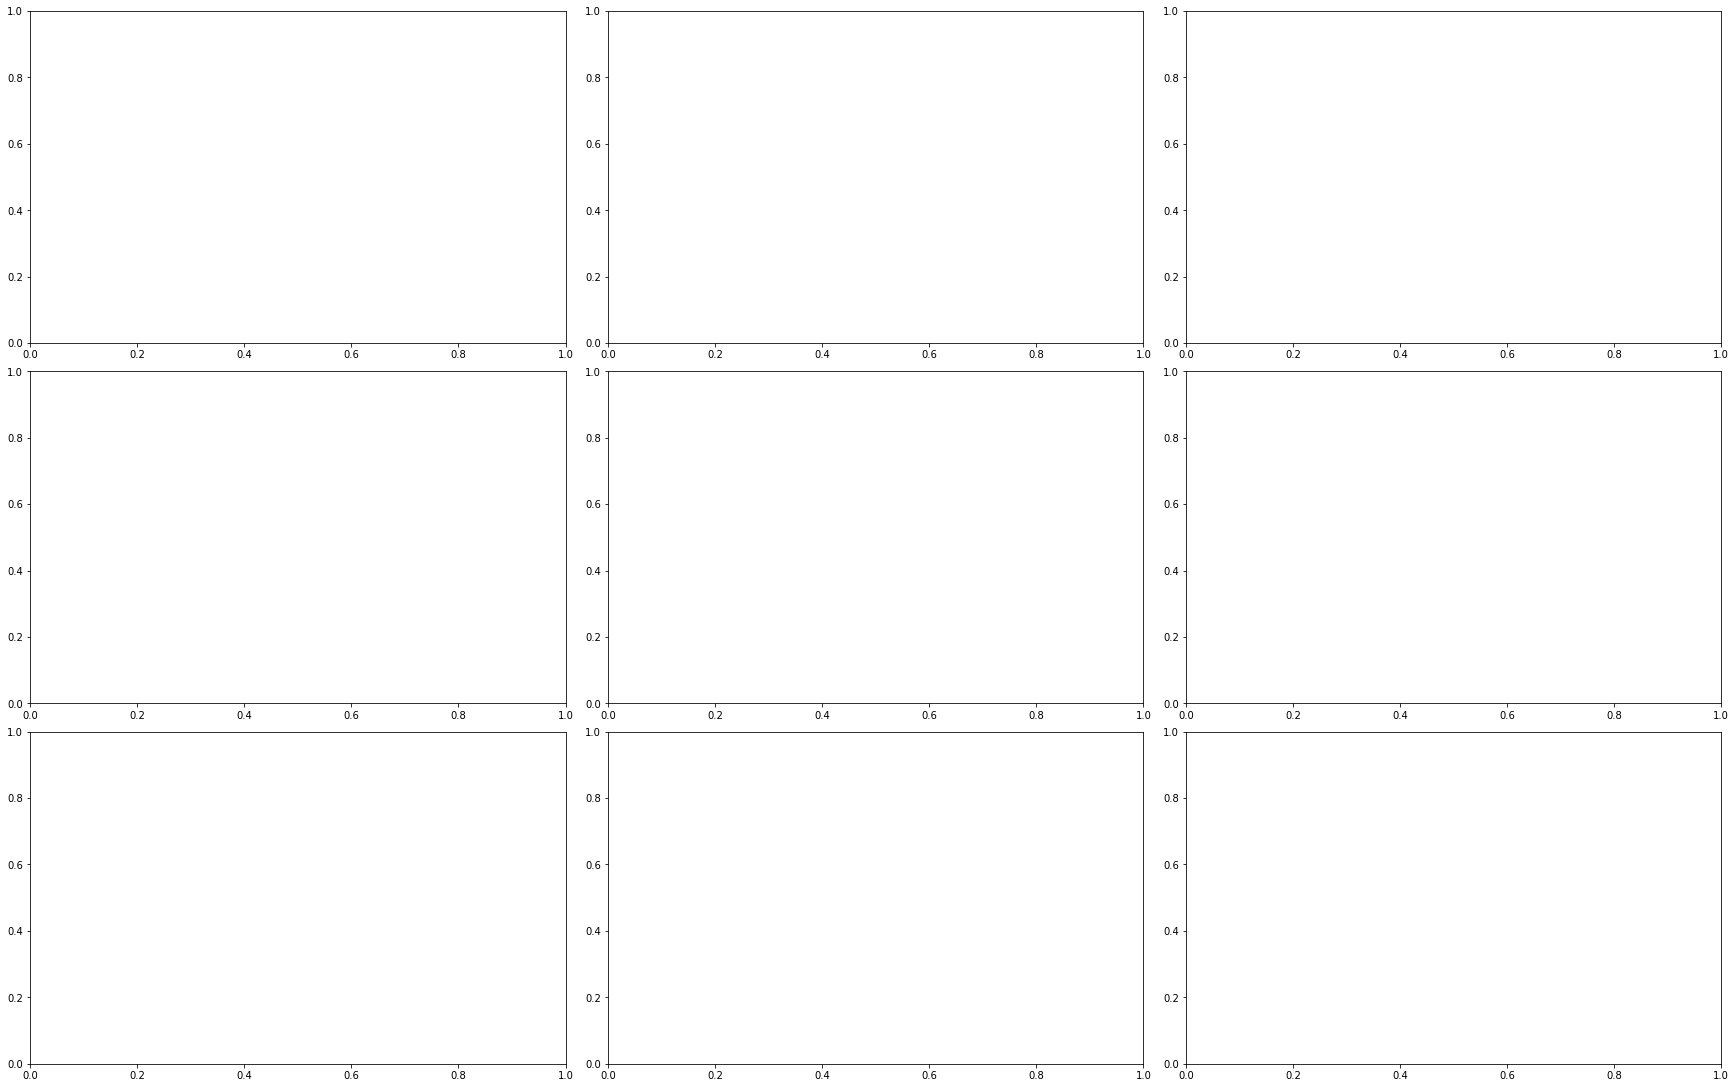

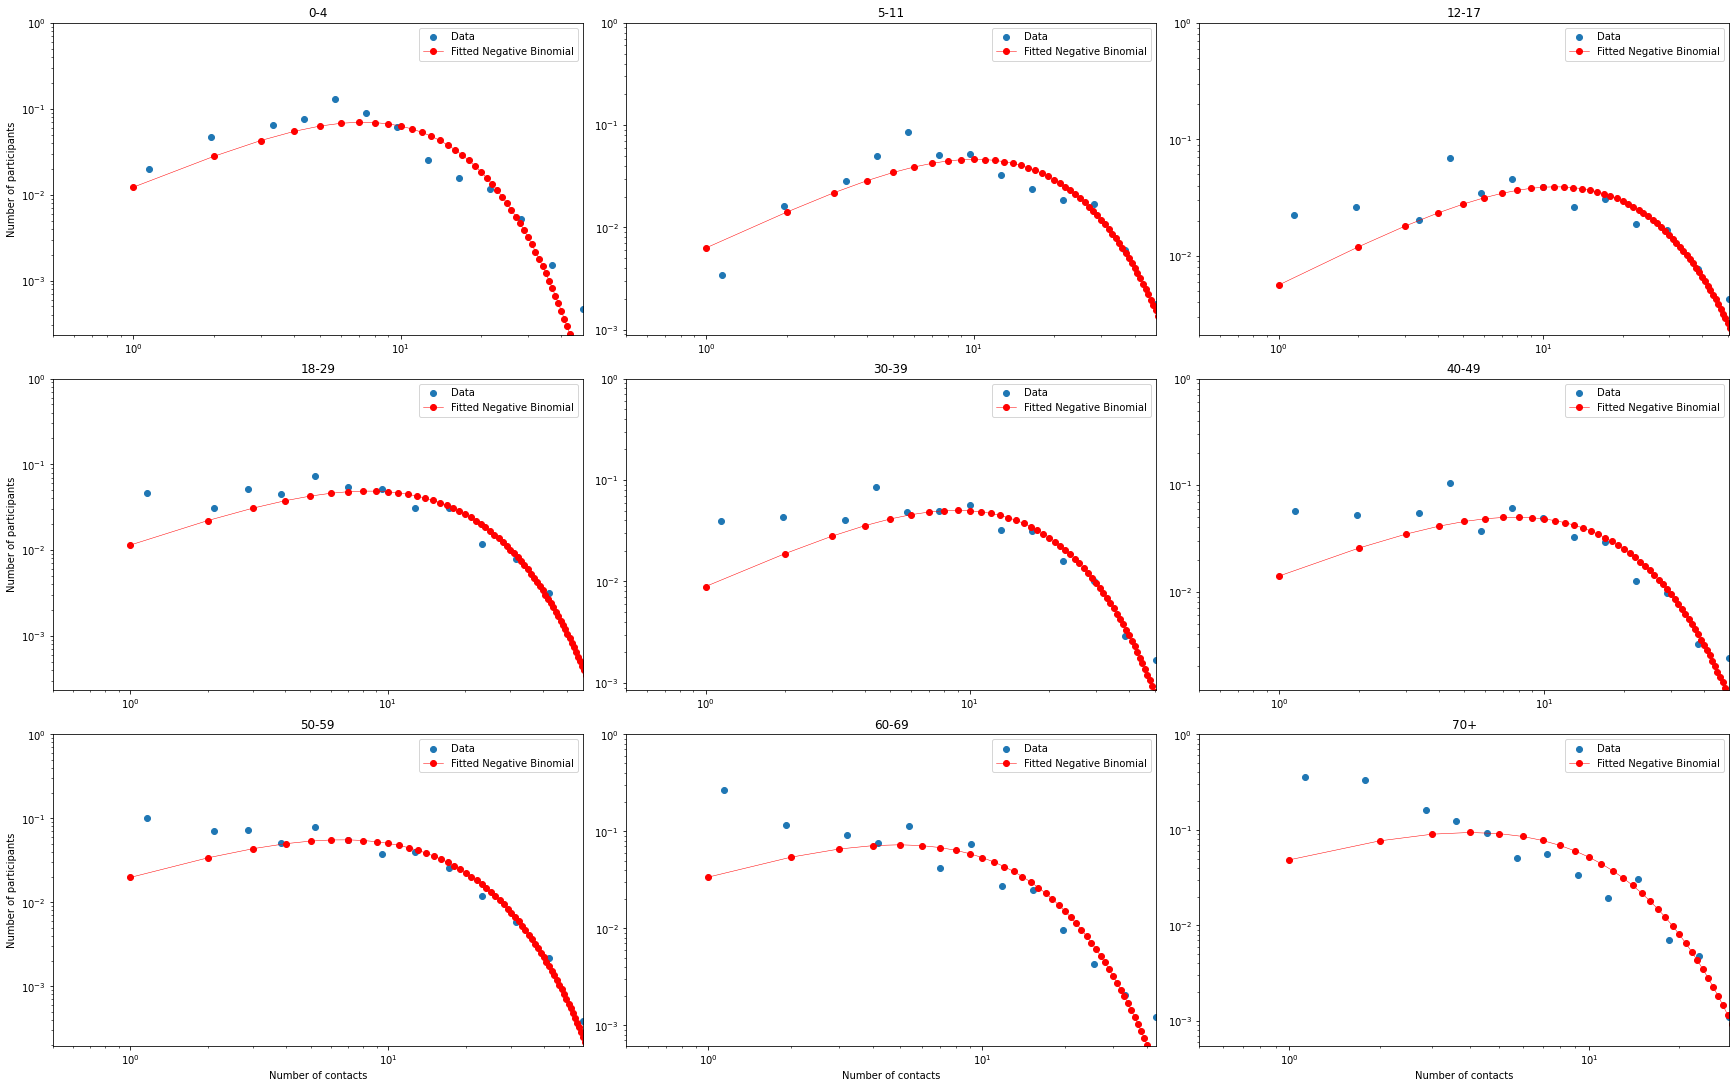

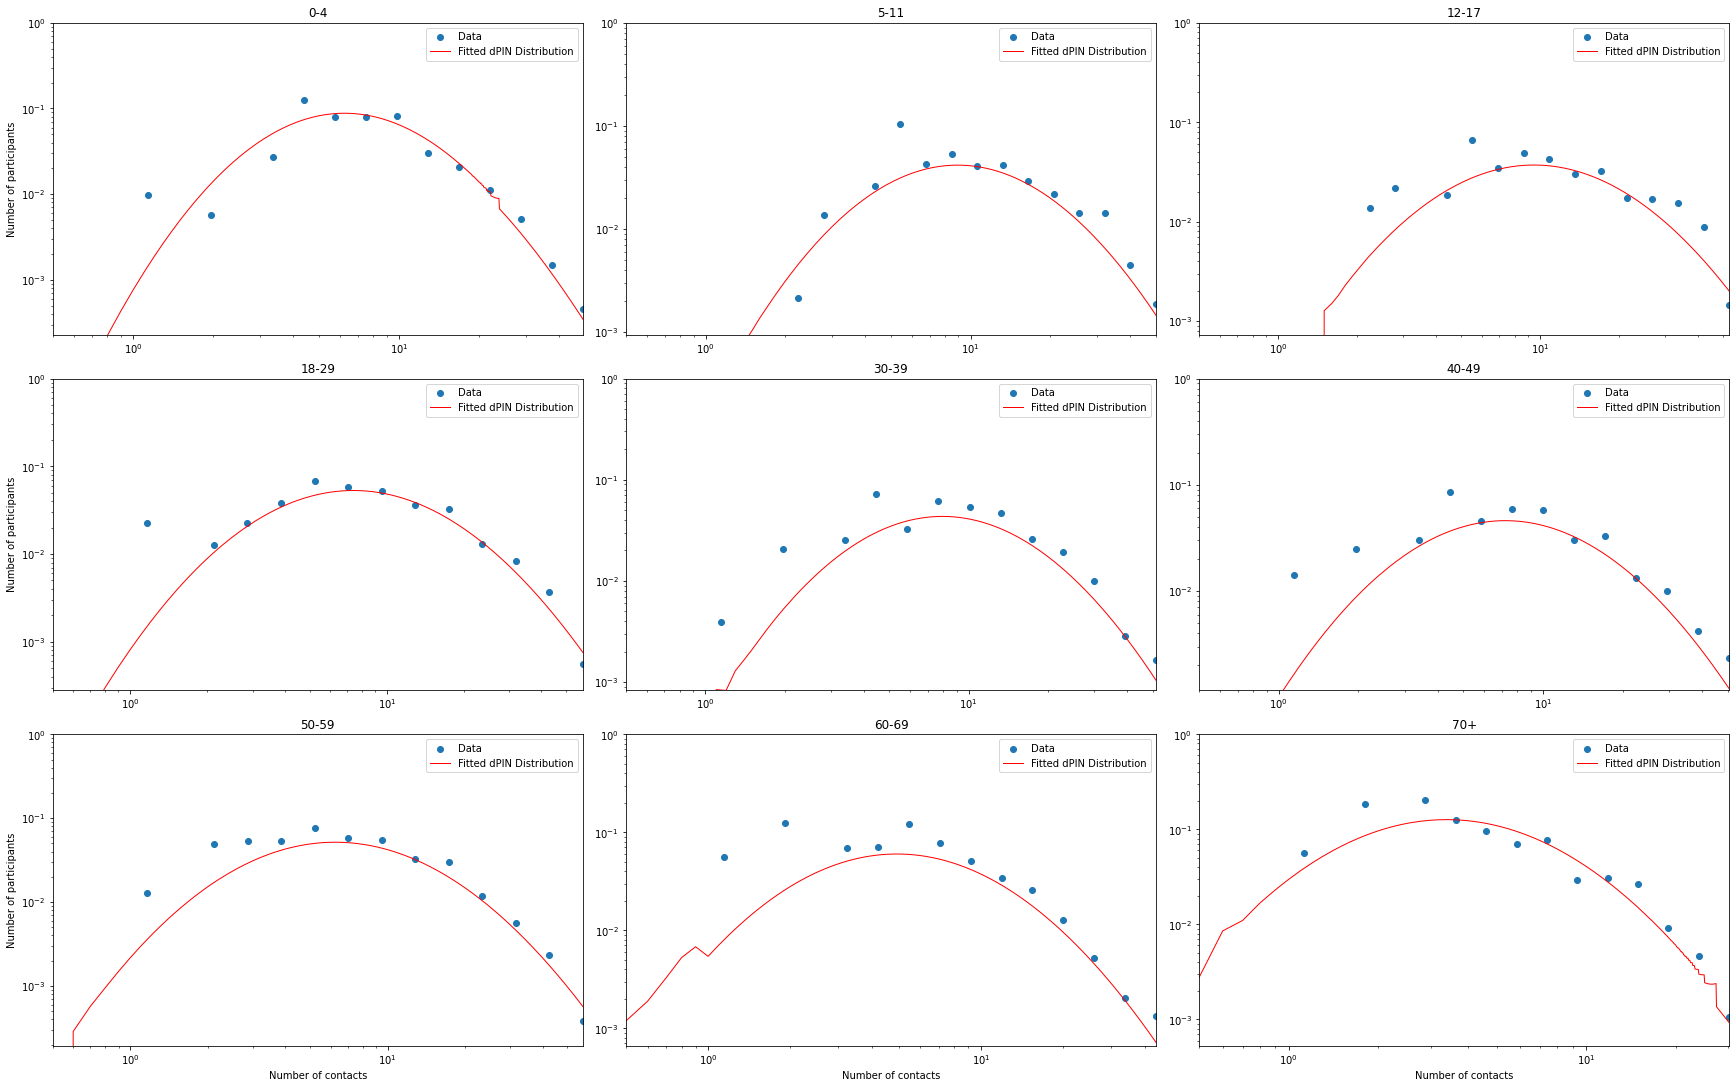

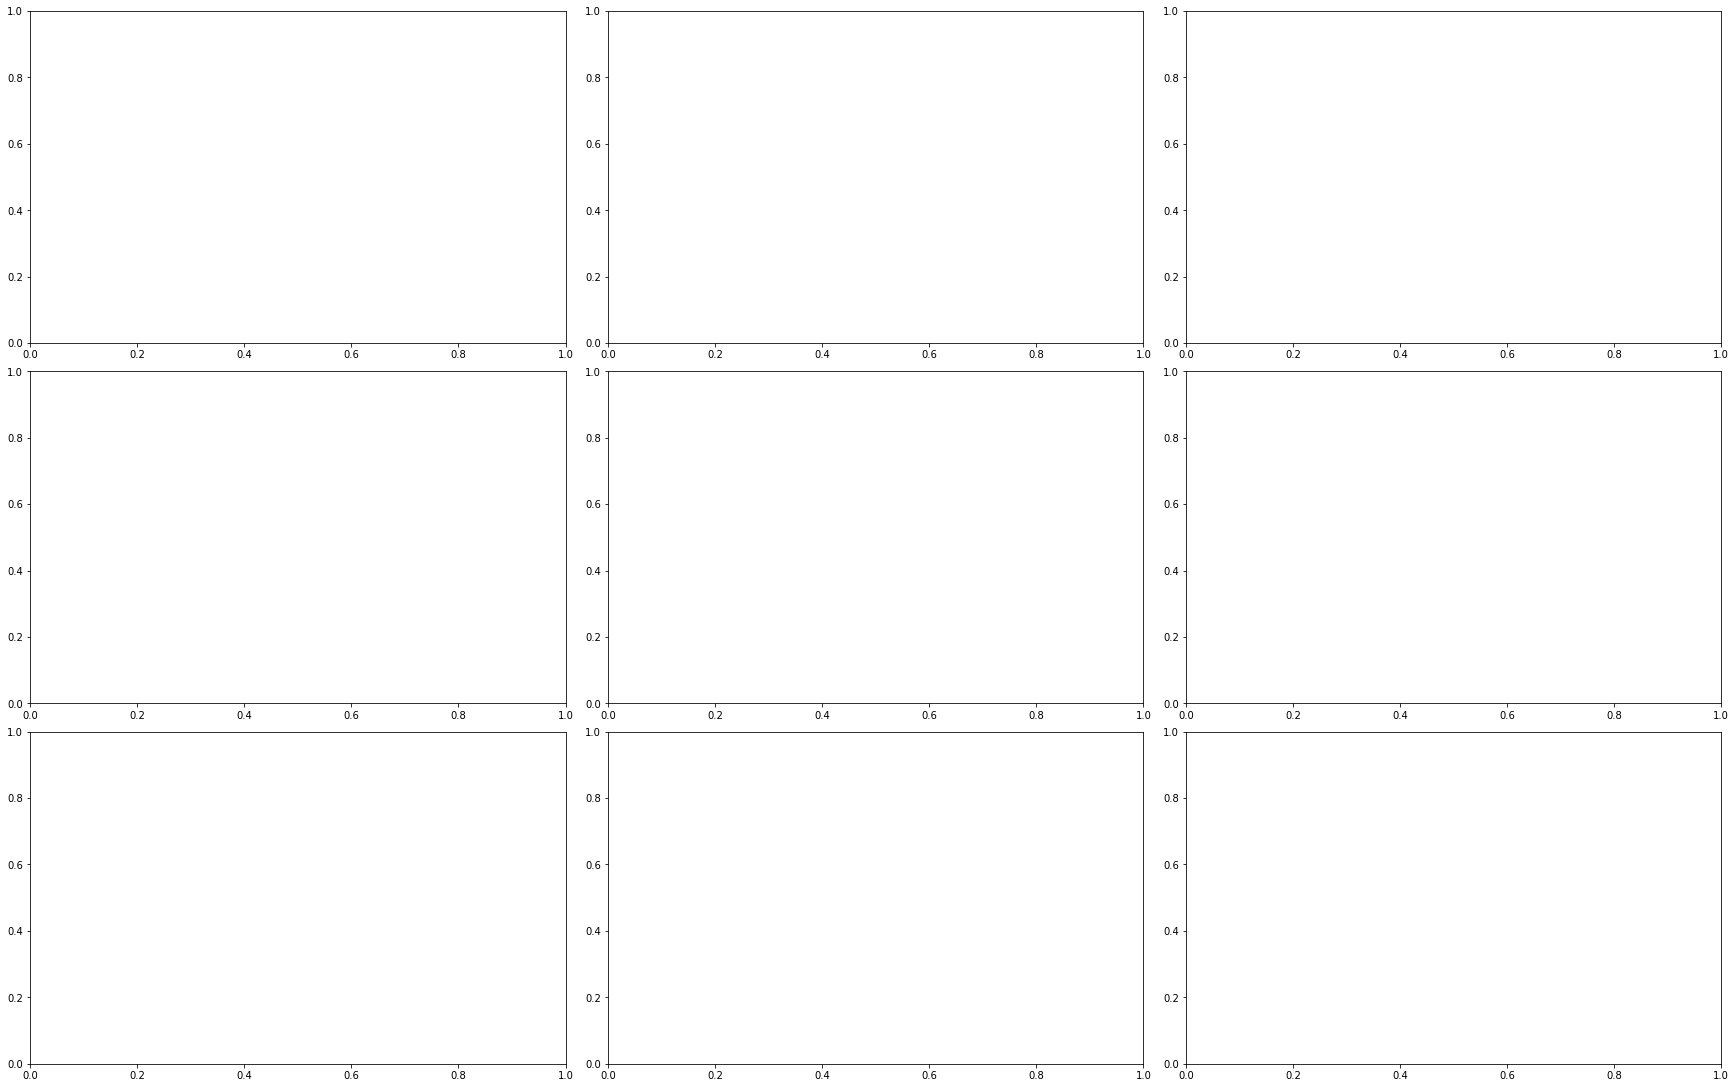

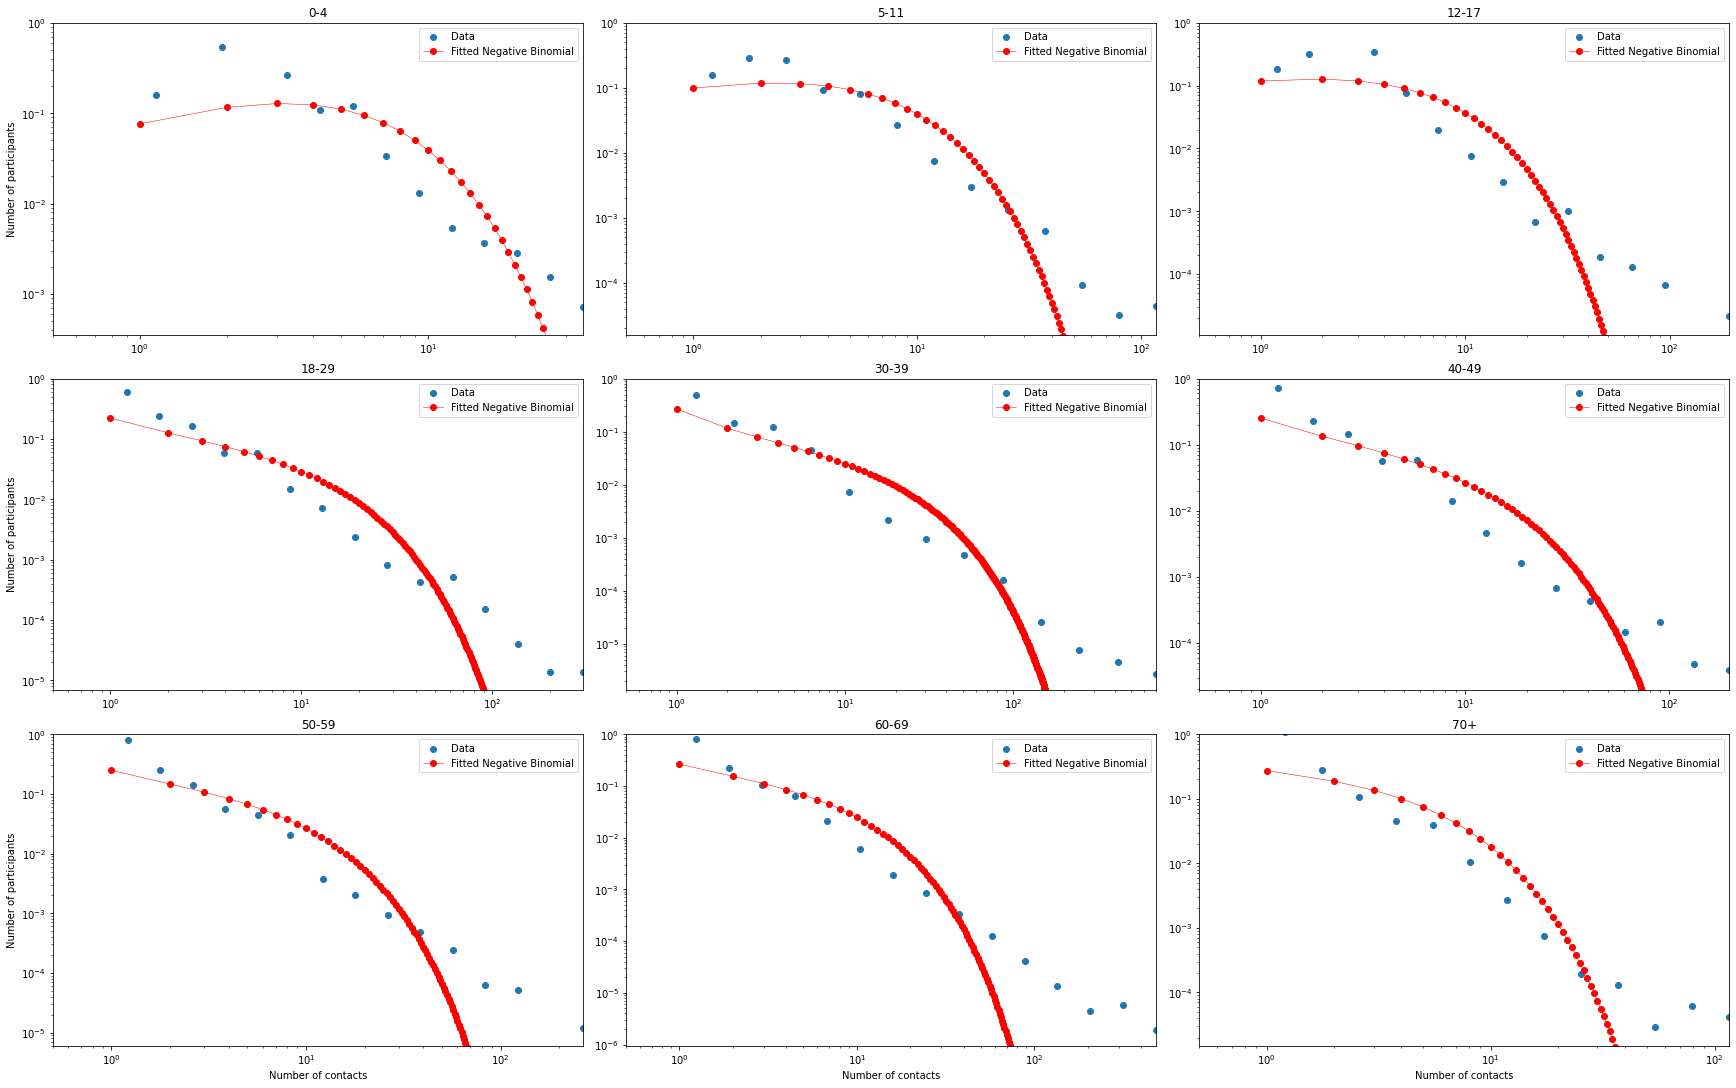

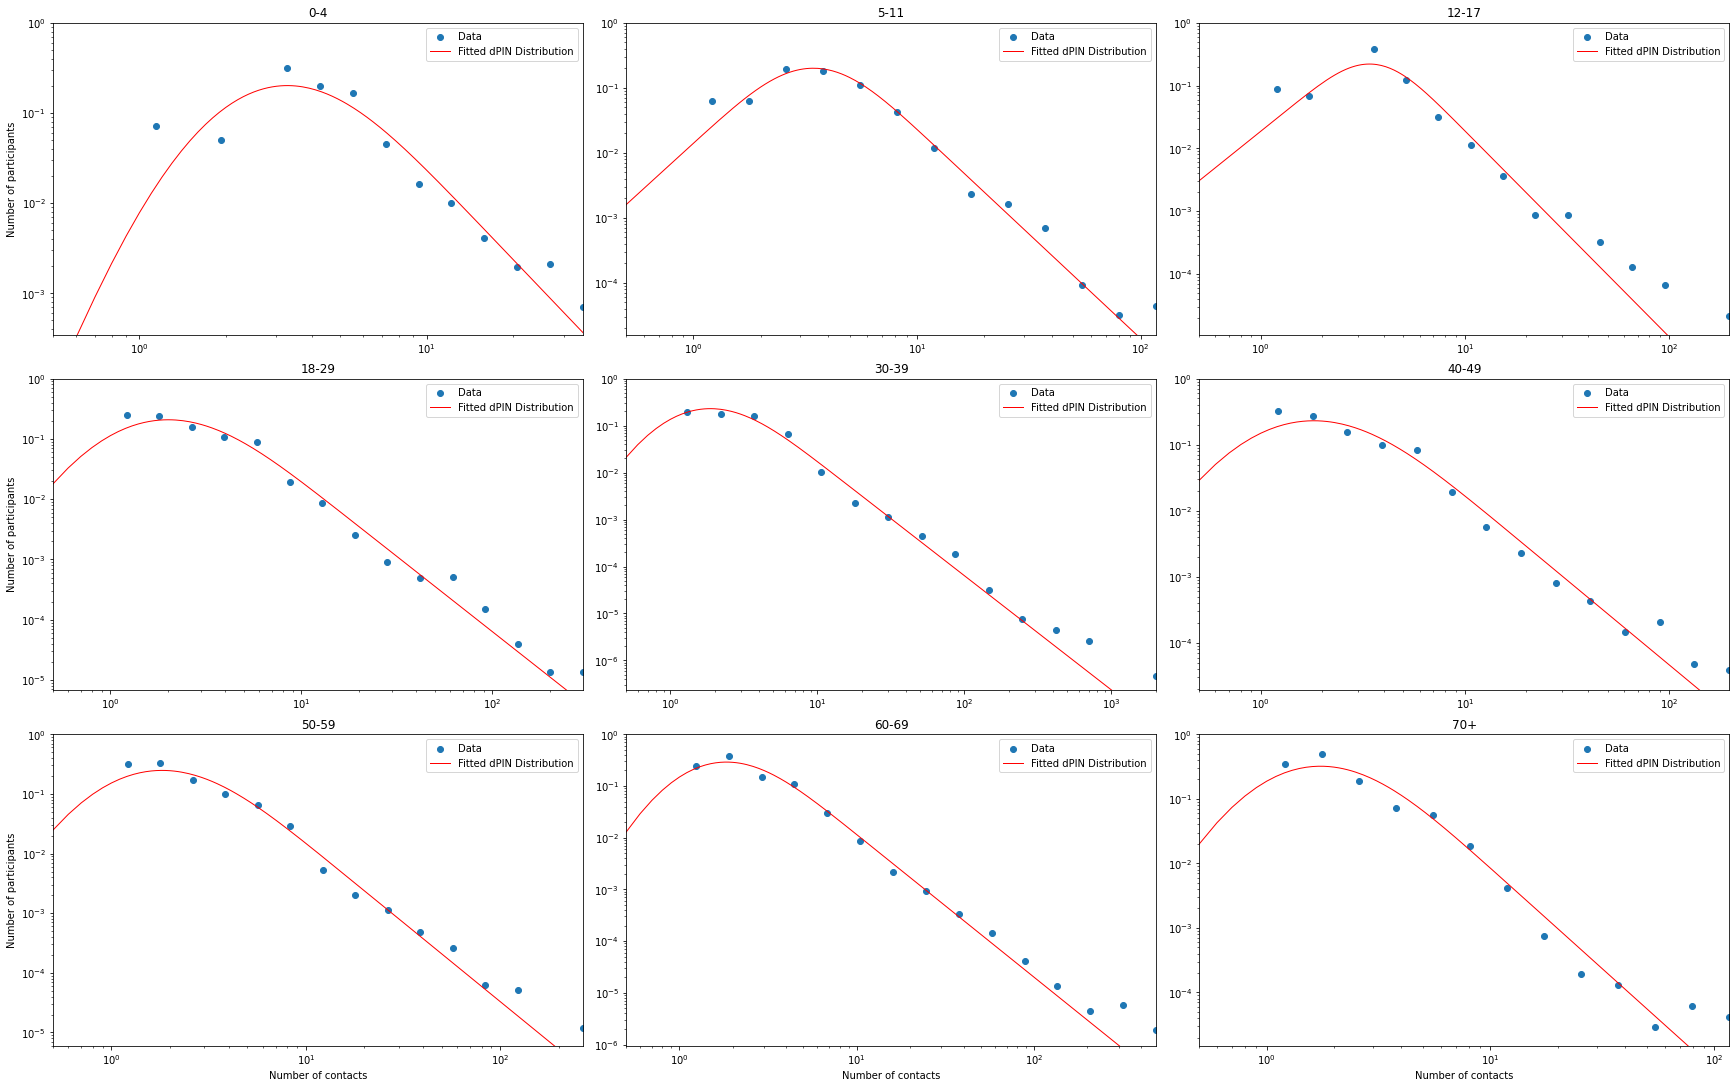

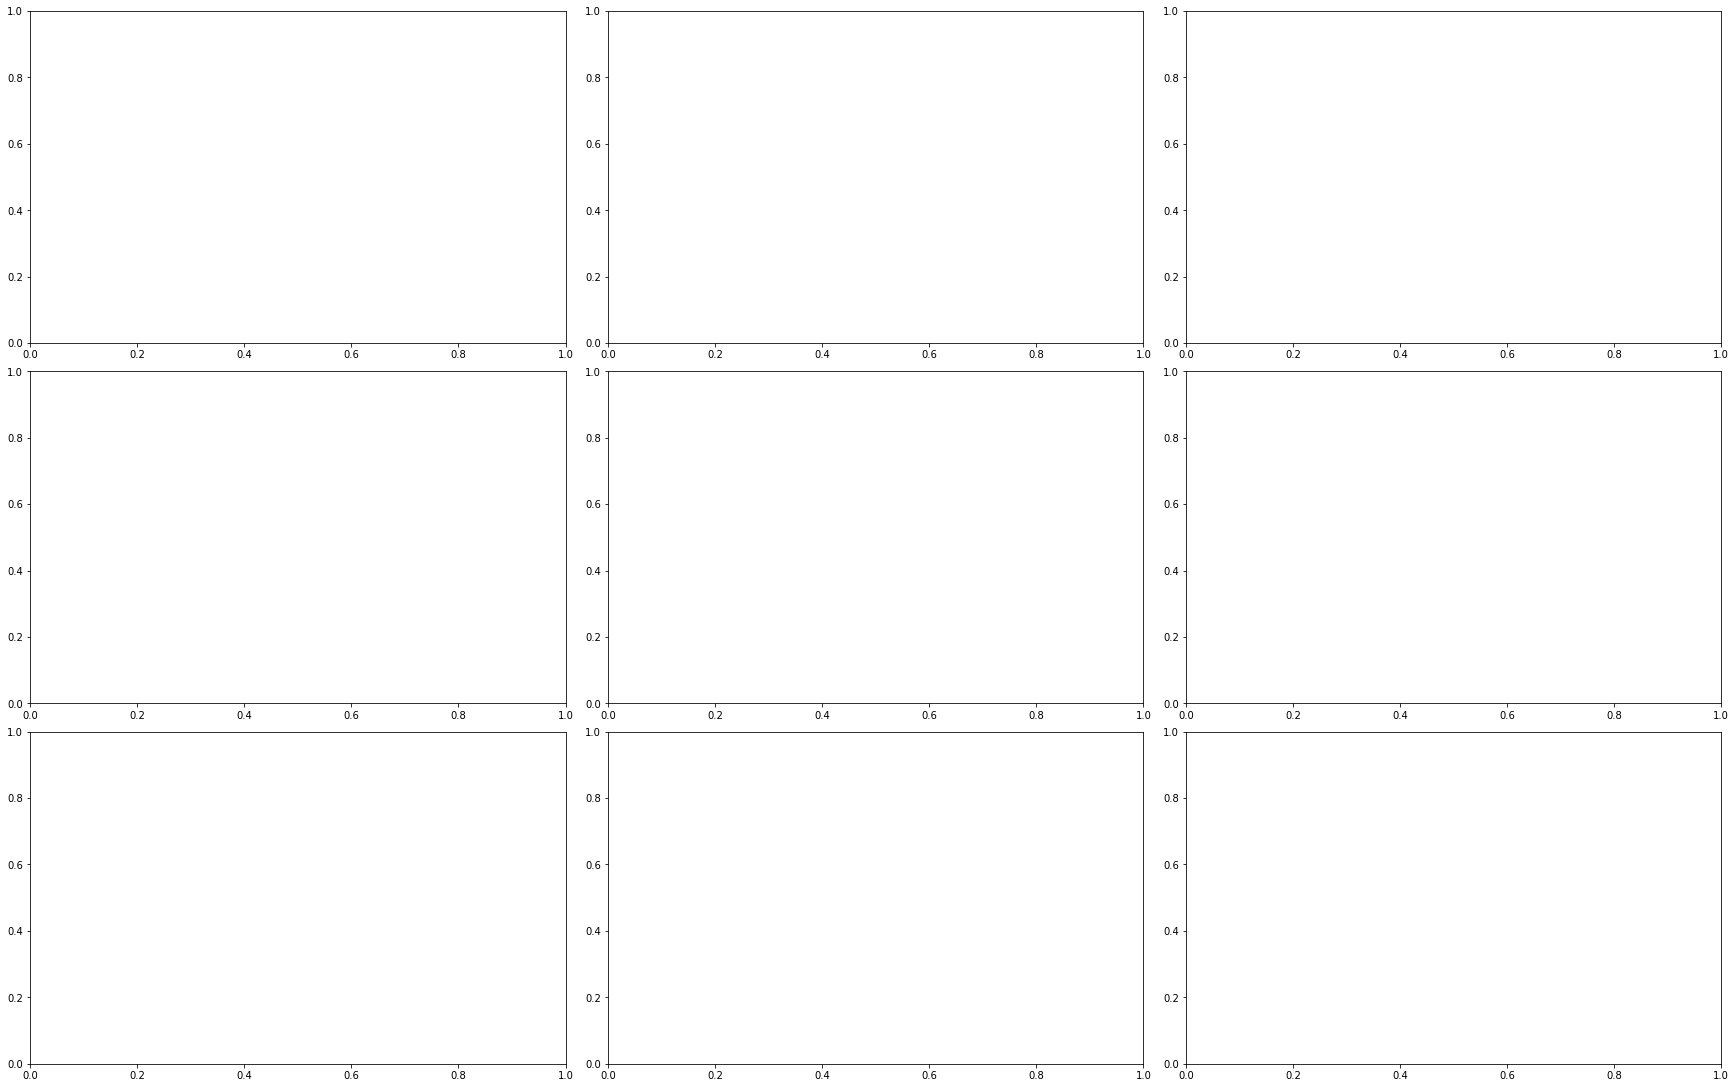

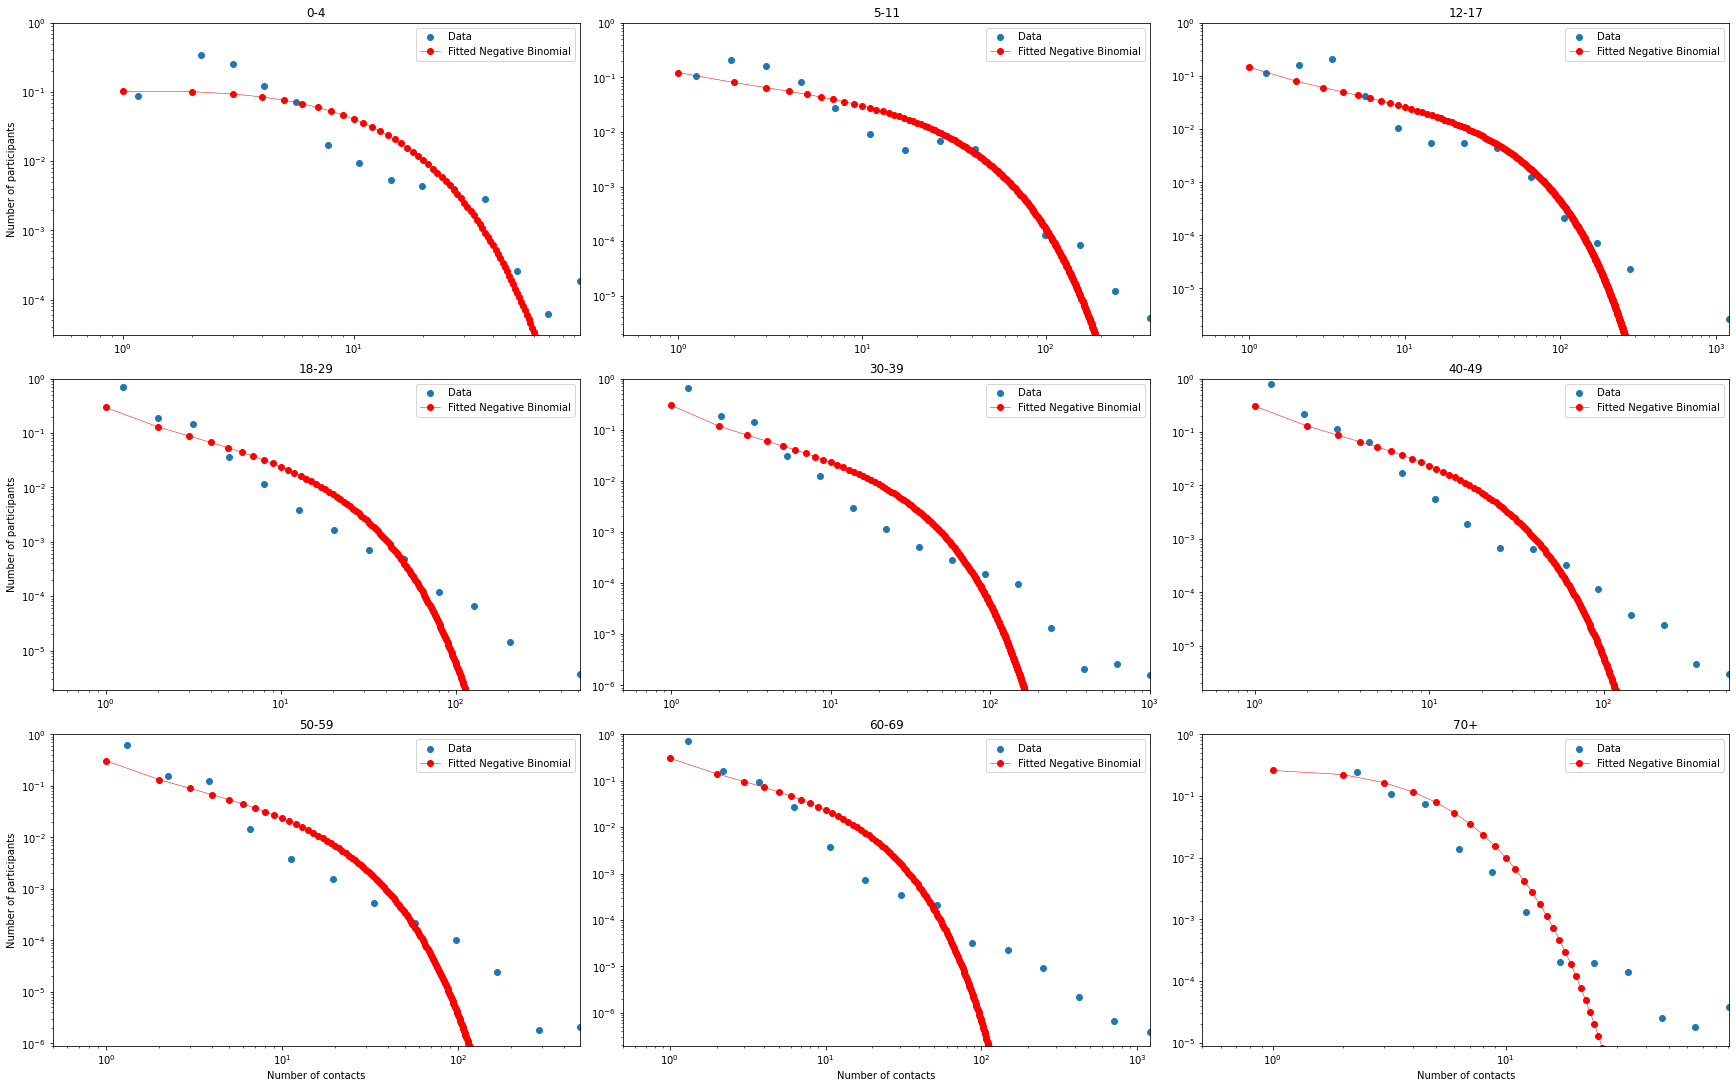

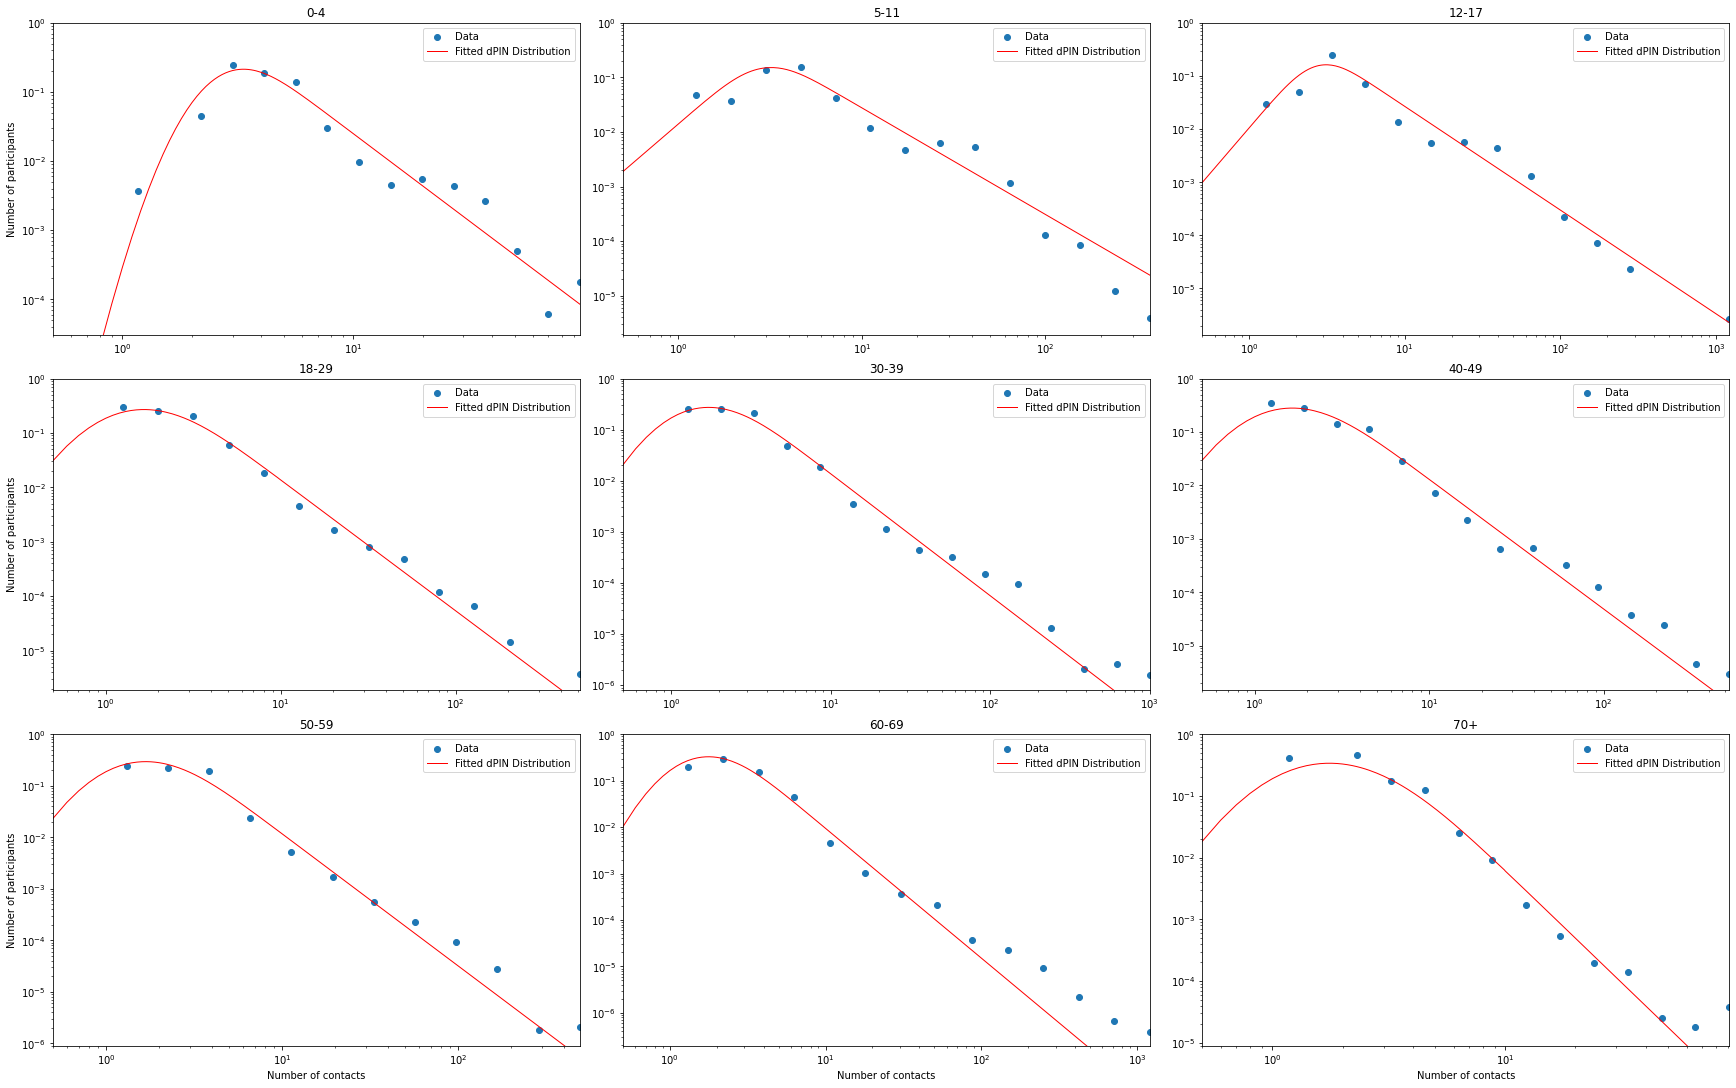

In [4]:
n, iters = 100_000, 1_000

buckets = np.array([5,12,18,30,40,50,60,70])
partitions = [0.058*n, 0.145*n, 0.212*n, 0.364*n, 0.497*n, 0.623*n, 0.759*n, 0.866*n, n]
group_sizes = [partitions[i] if i ==0 else partitions[i]-partitions[i-1] for i,_ in enumerate(partitions)]

datas = ['poly','comix1', 'comix2']
models = ['sbm', 'nbinom', 'dpln']
scale1 = 'none'

for data in datas:
    for model in models:
        egos, contact_matrix, params = nd_p.fit_to_data(input_file_path=f'input_data/{data}.csv',dist_type=model,log=True)
        if model != models[0]:
            np.savetxt(f'input_data/parameters/params_{data}_{model}.csv', params, delimiter=',')
        np.savetxt(f'input_data/contact_matrices/contact_matrix_{data}.csv', contact_matrix, delimiter=',')

poly (sbm) = 13.470400665465132
egos:  12.566923531175847
what it says: 12.43248
Average Degree: 12.43248
[4, 6, 5, 5, 9, 2, 3, 3, 4, 3, 2, 7, 4, 6, 4, 3, 4, 2, 3, 4, 3, 7, 2, 4, 4, 7, 7, 7, 4, 6]
12.58752
poly (nbinom) = 13.470400665465132
egos:  12.566923531175847
what it says: 11.58236
Average Degree: 11.58236
[2, 8, 8, 15, 26, 8, 1, 16, 10, 19, 2, 7, 18, 5, 11, 4, 7, 4, 7, 7, 4, 8, 23, 6, 8, 2, 4, 6, 13, 10]
12.62987
poly (dpln) = 13.470400665465132
egos:  12.566923531175847
what it says: 11.70092
Average Degree: 11.70088
[19, 0, 3, 11, 20, 8, 6, 9, 11, 2, 1, 9, 10, 3, 6, 3, 20, 12, 2, 3, 10, 5, 10, 2, 5, 11, 1, 8, 3, 8]
comix1 (sbm) = 5.215791541181092
egos:  5.260307125461147
what it says: 4.67044
Average Degree: 4.67044
[1, 4, 3, 1, 4, 2, 0, 4, 2, 2, 0, 1, 3, 2, 2, 1, 6, 0, 2, 3, 1, 2, 1, 1, 4, 1, 0, 2, 4, 0]
5.27095
comix1 (nbinom) = 5.215791541181092
egos:  5.260307125461147
what it says: 4.8609
Average Degree: 4.8609
[0, 2, 2, 3, 9, 3, 1, 7, 8, 3, 11, 9, 7, 3, 11, 3, 8, 2, 6,

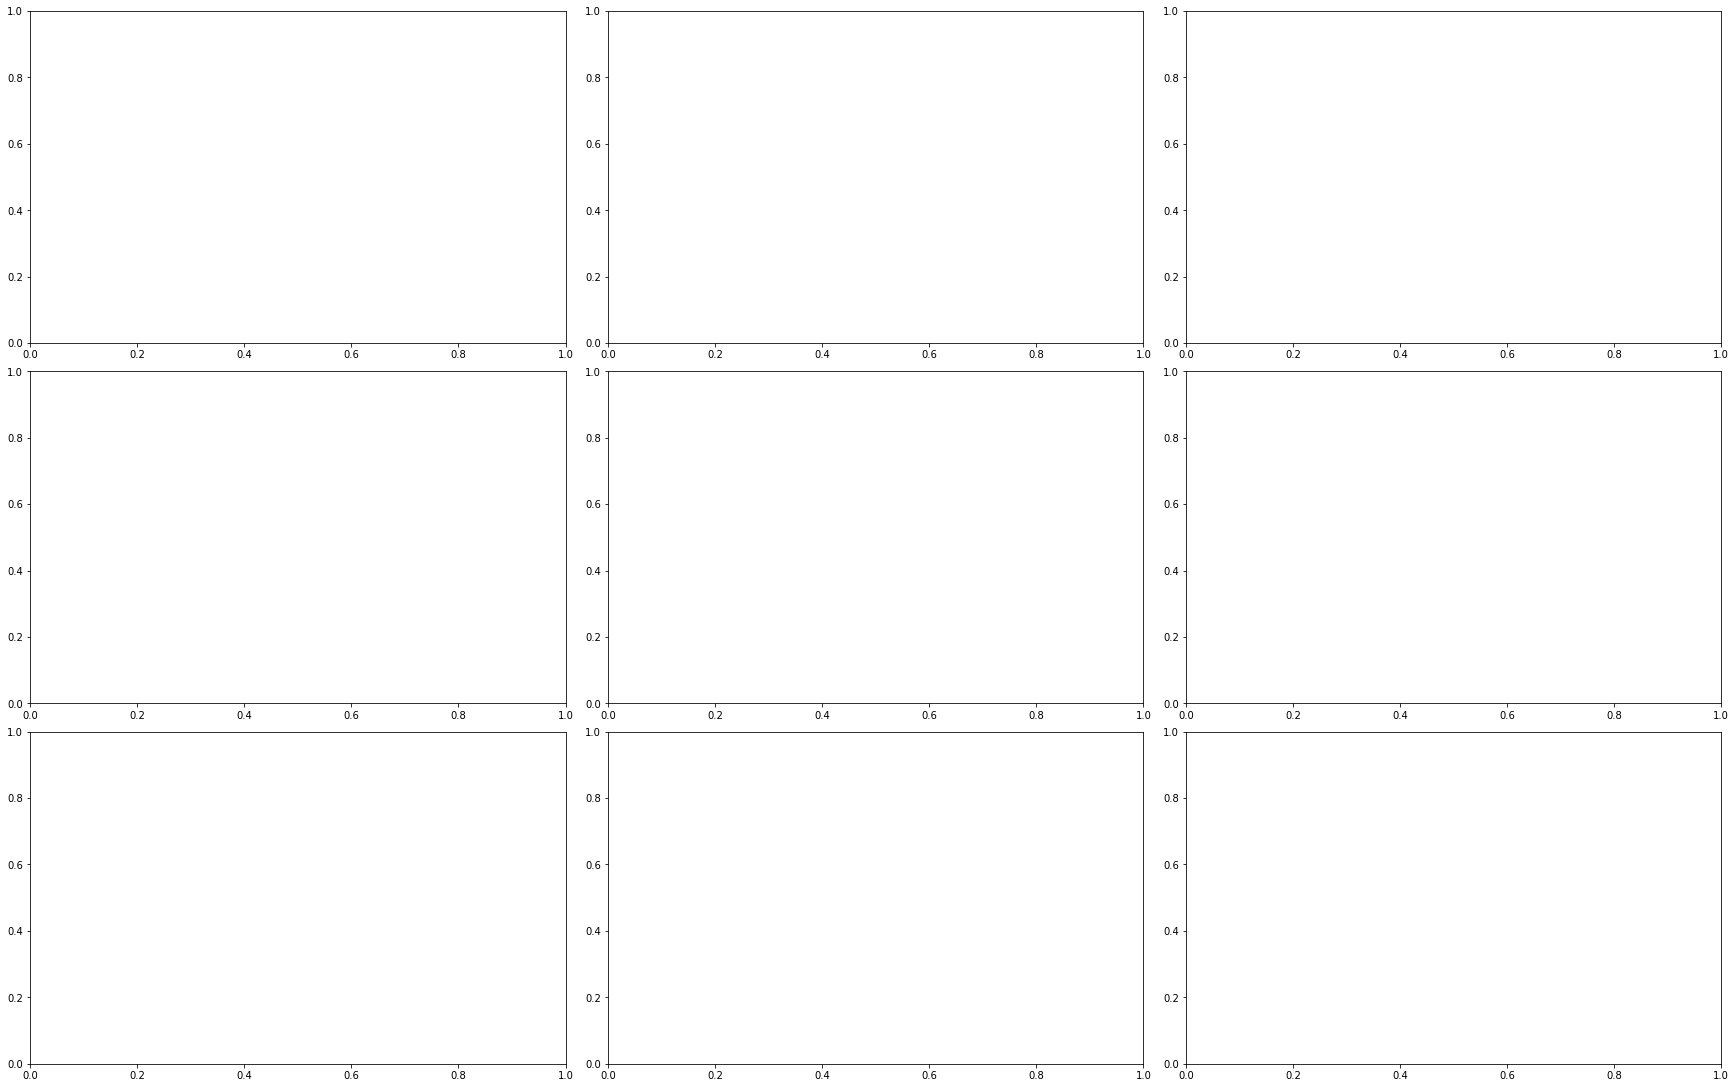

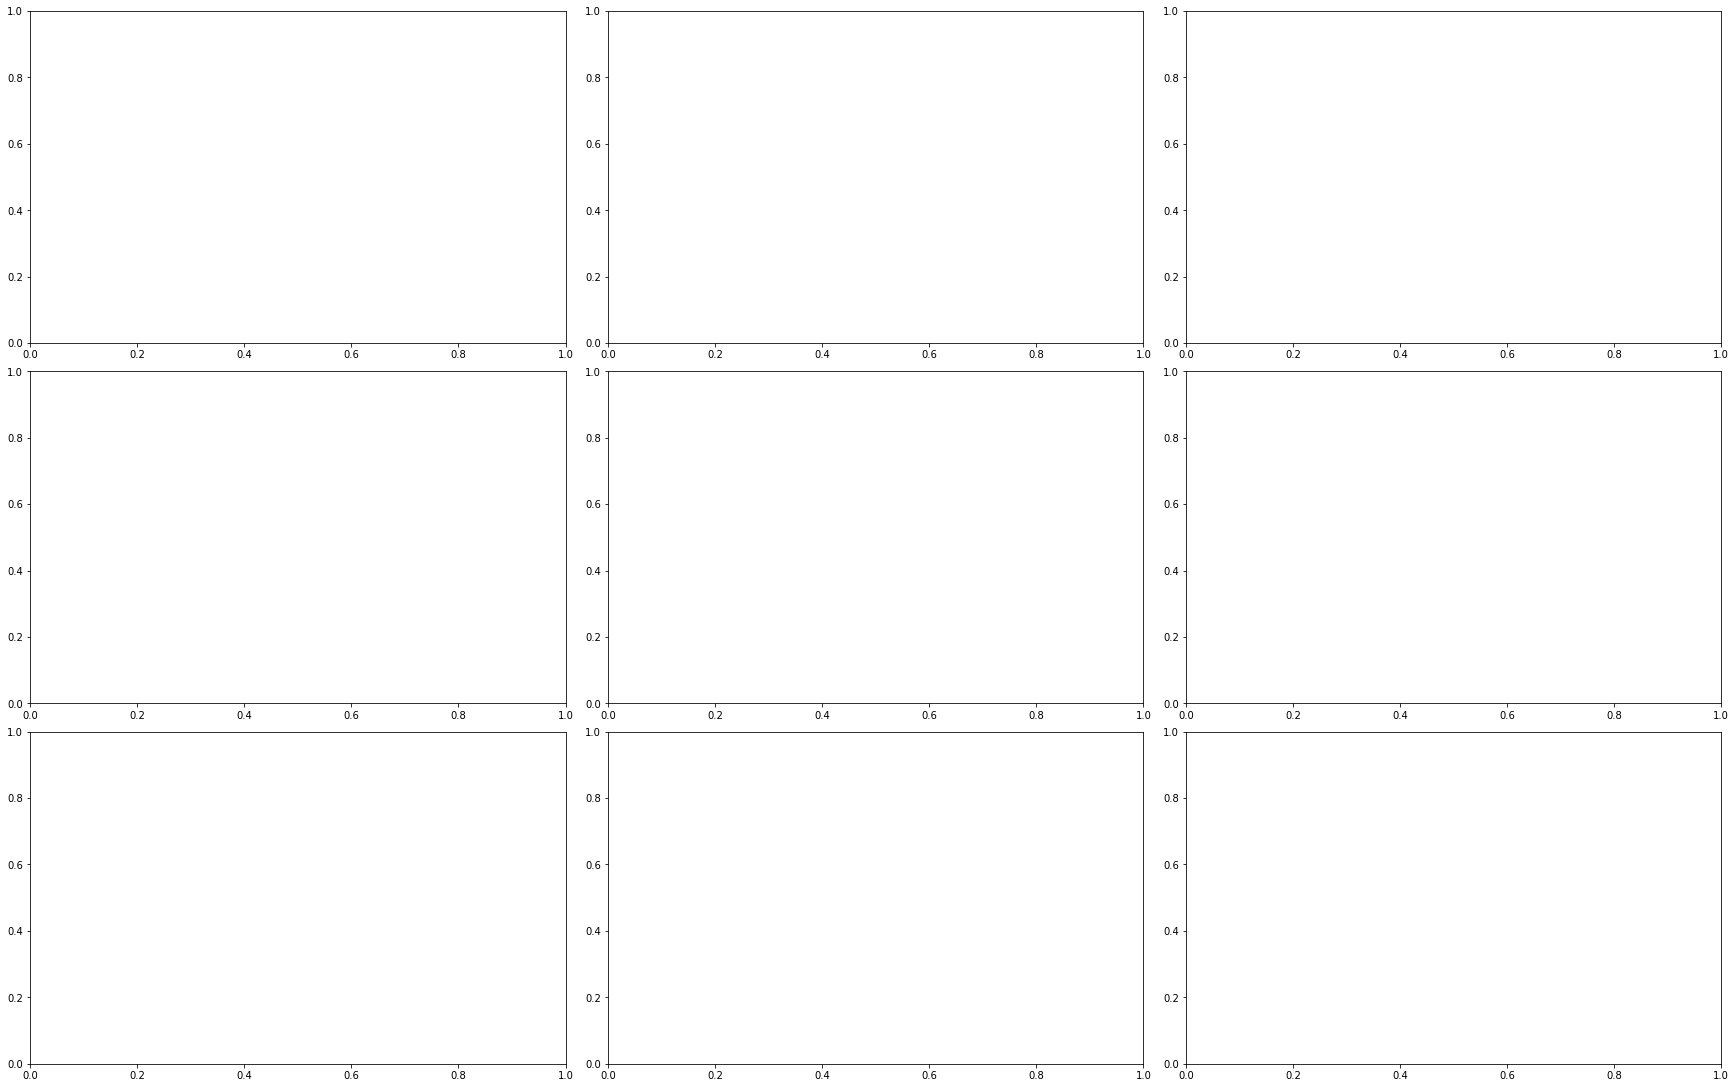

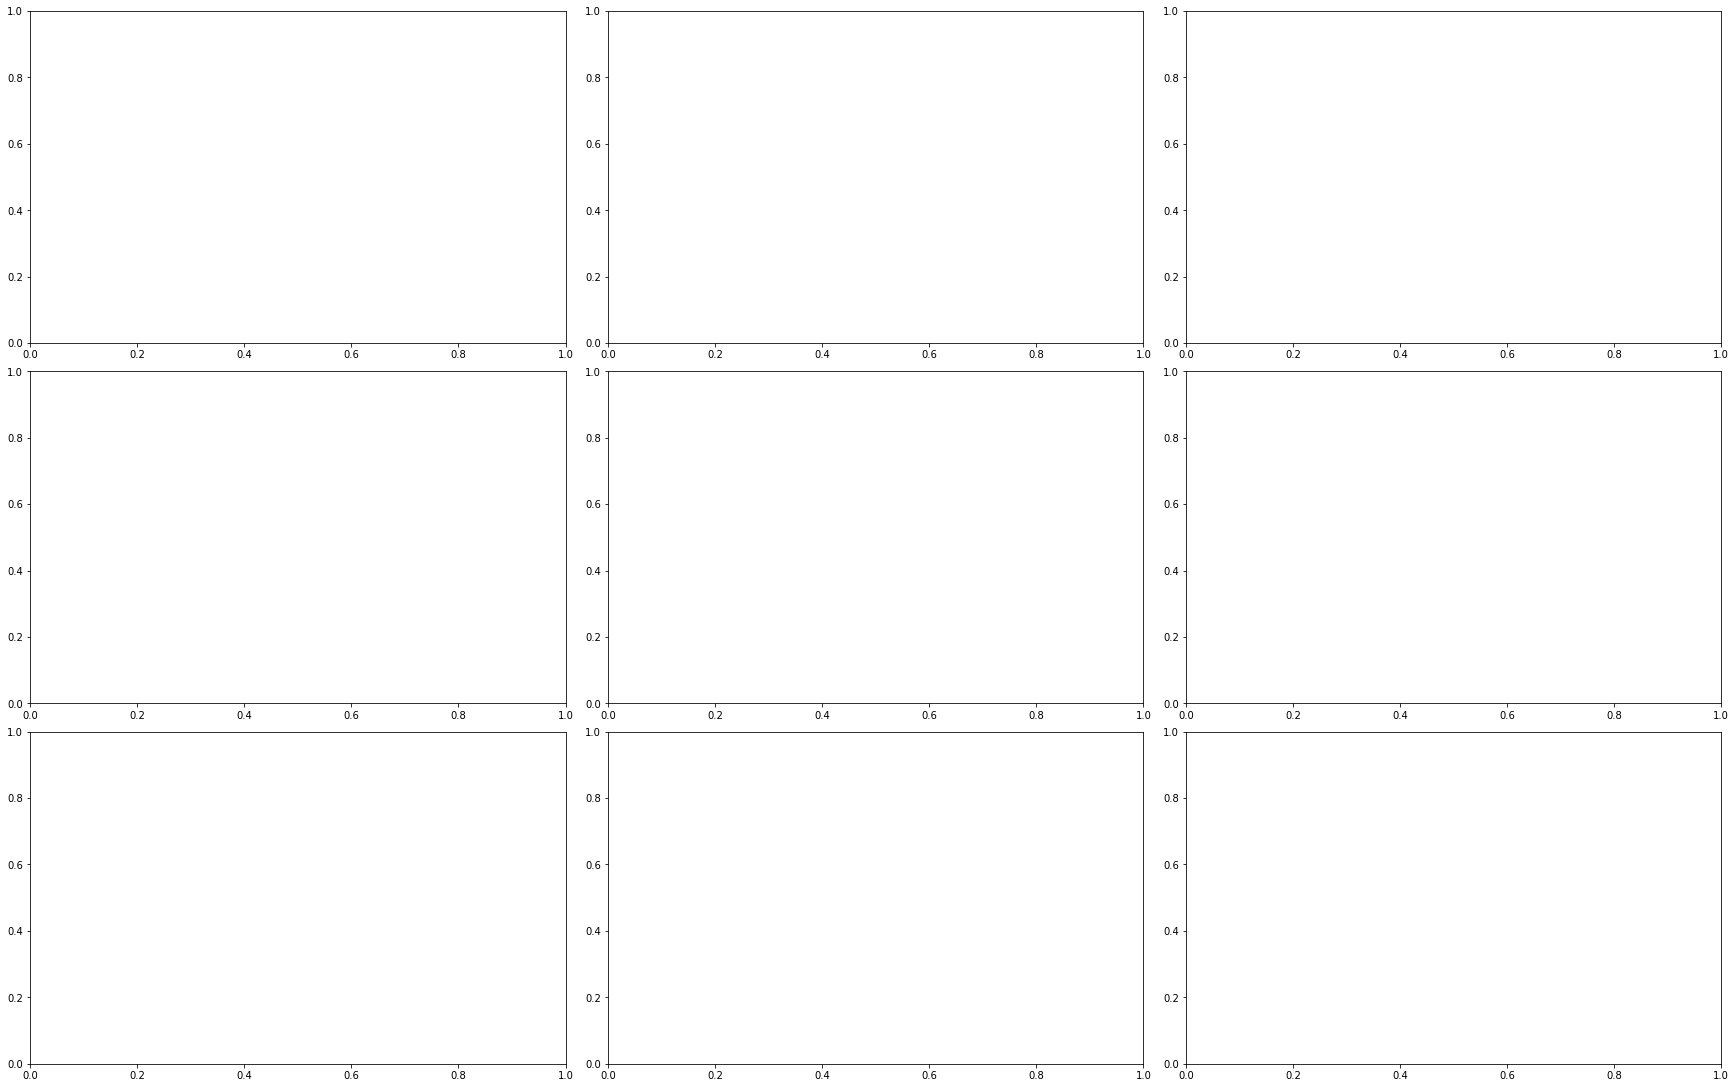

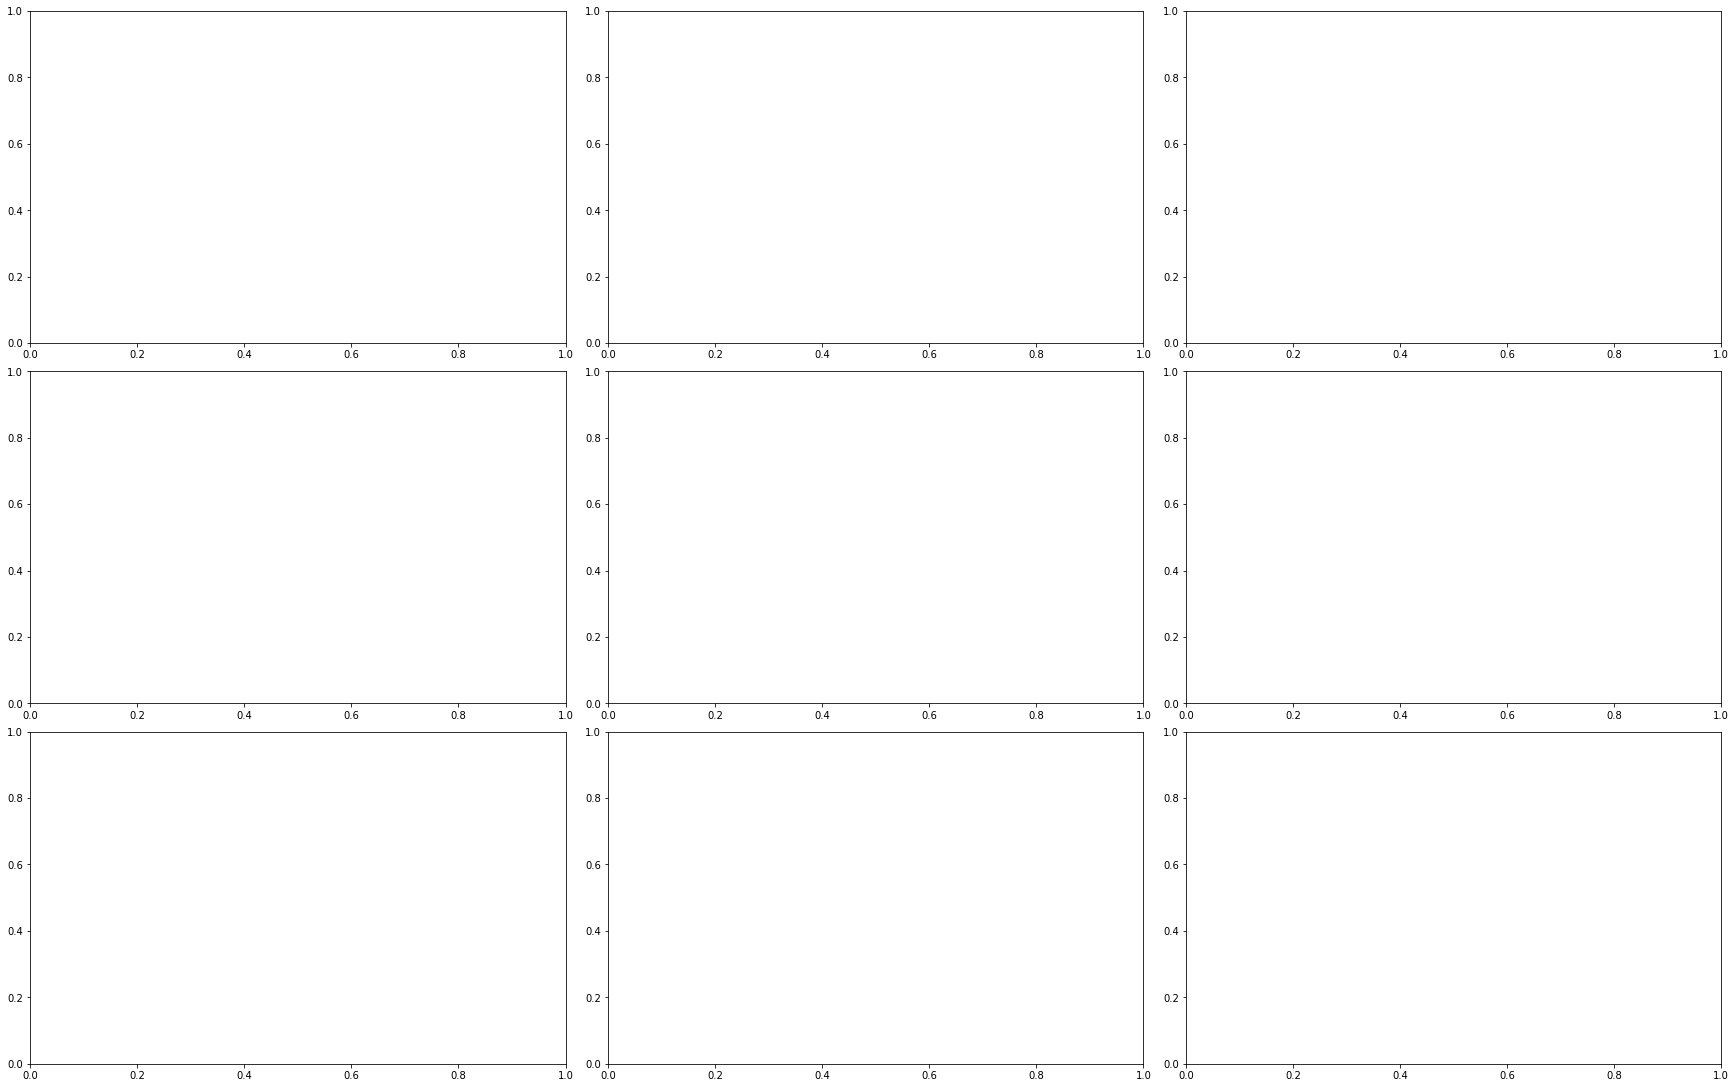

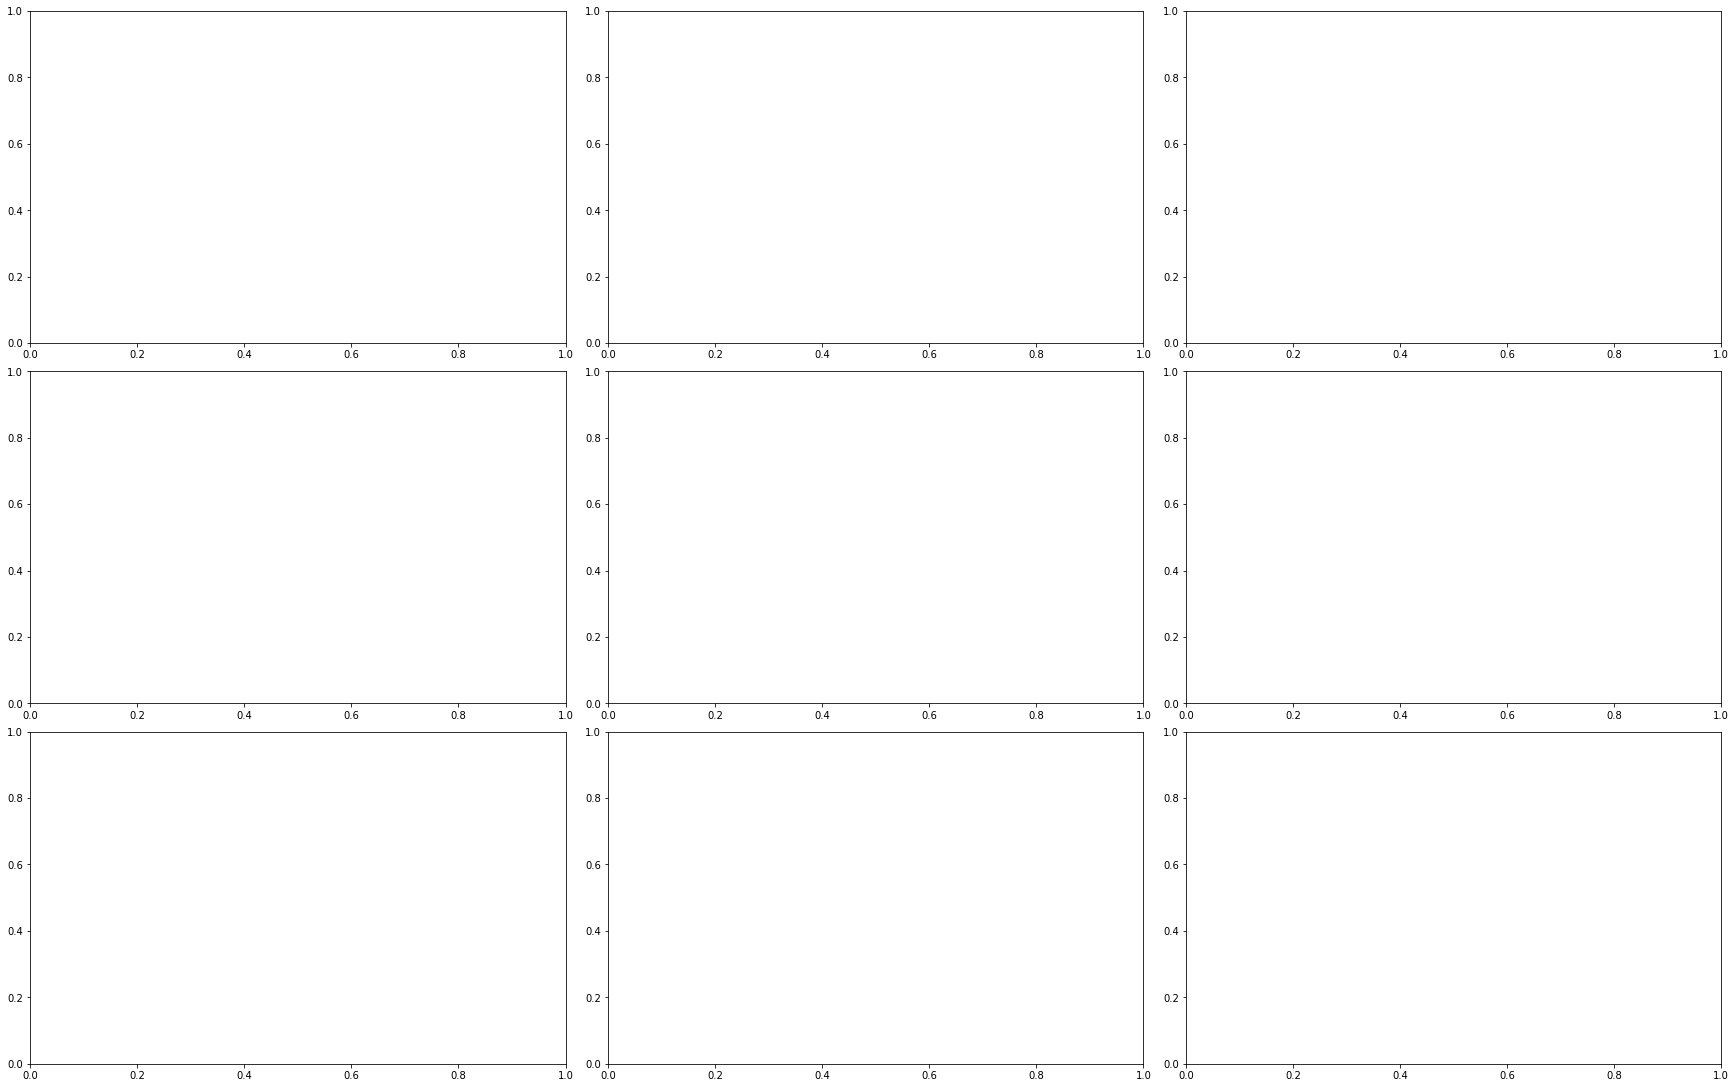

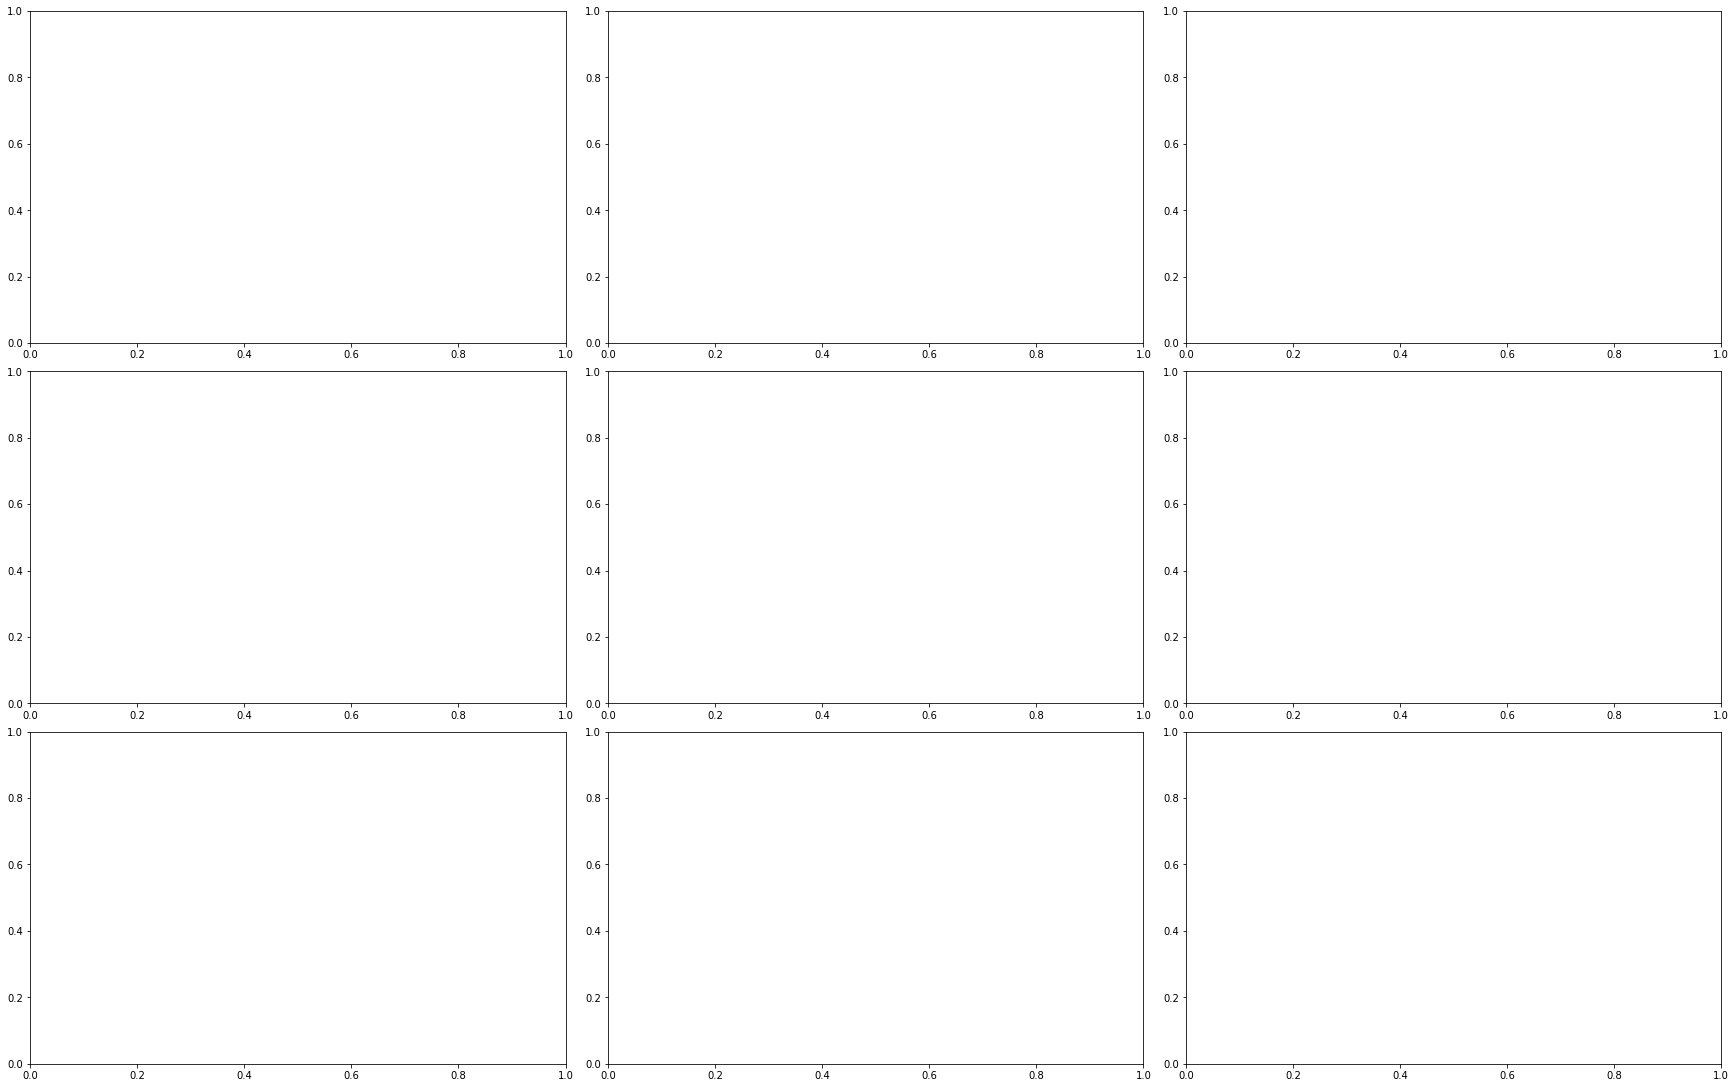

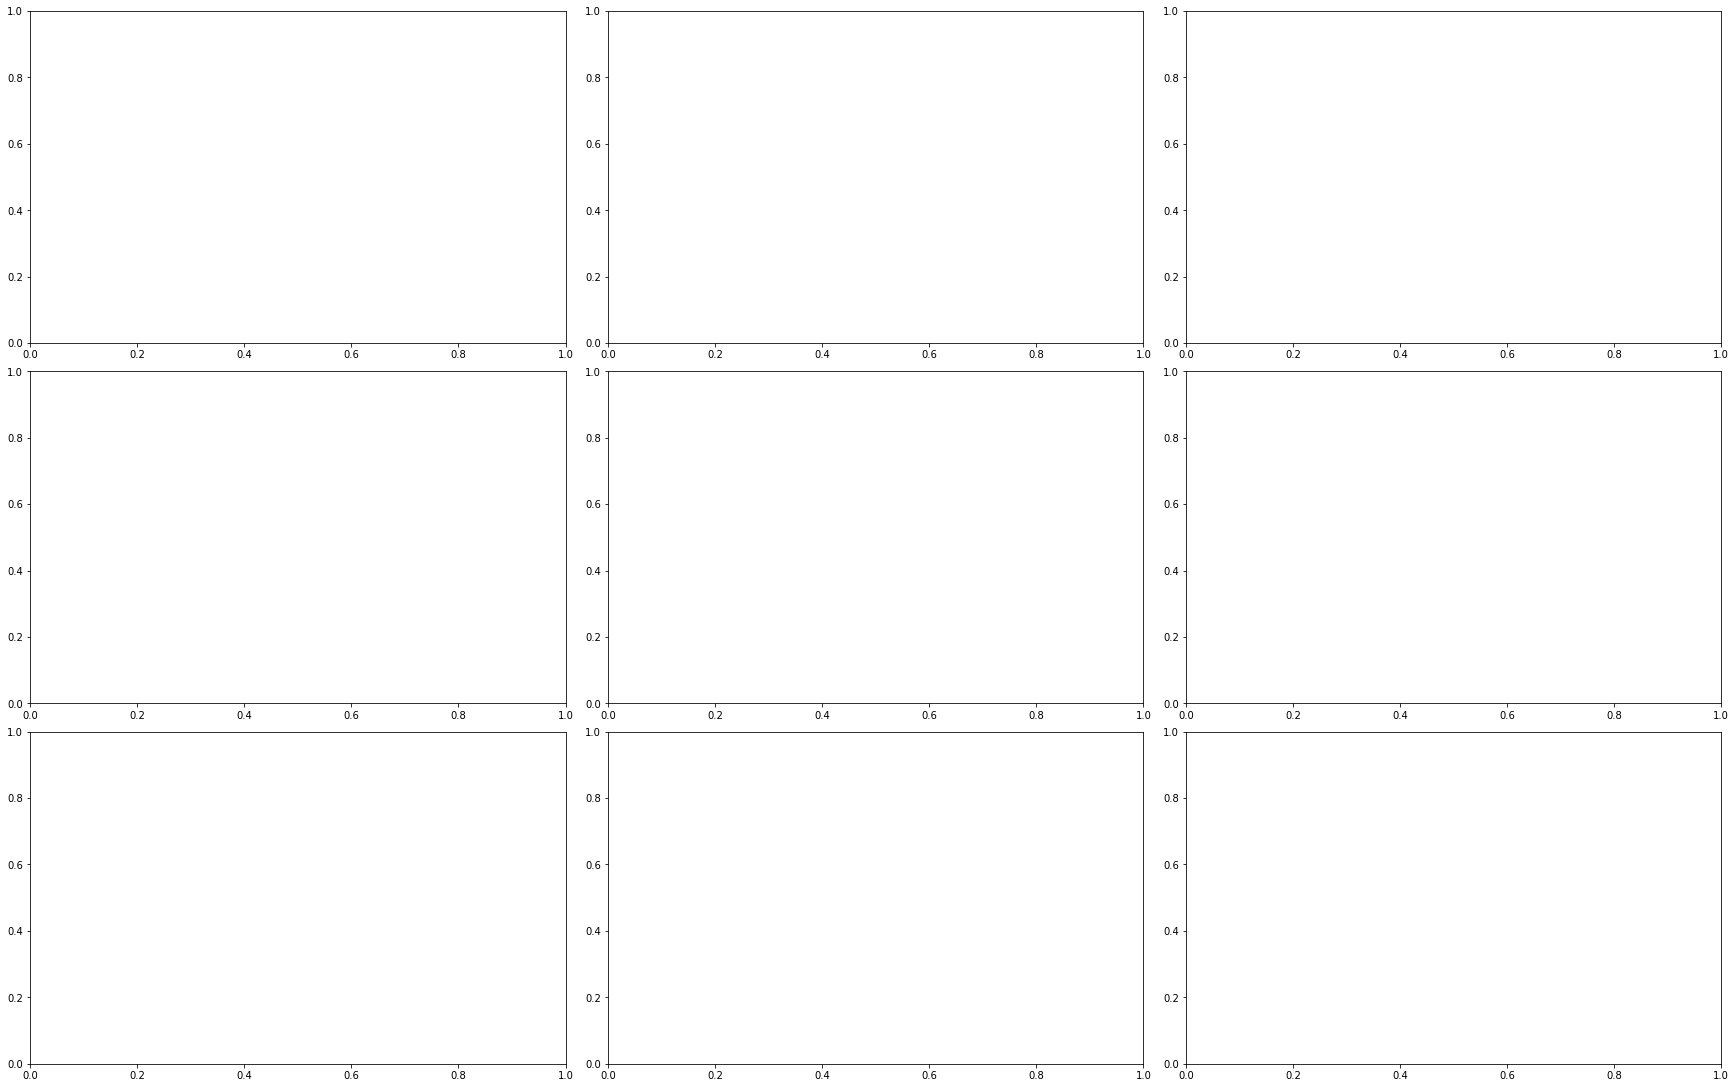

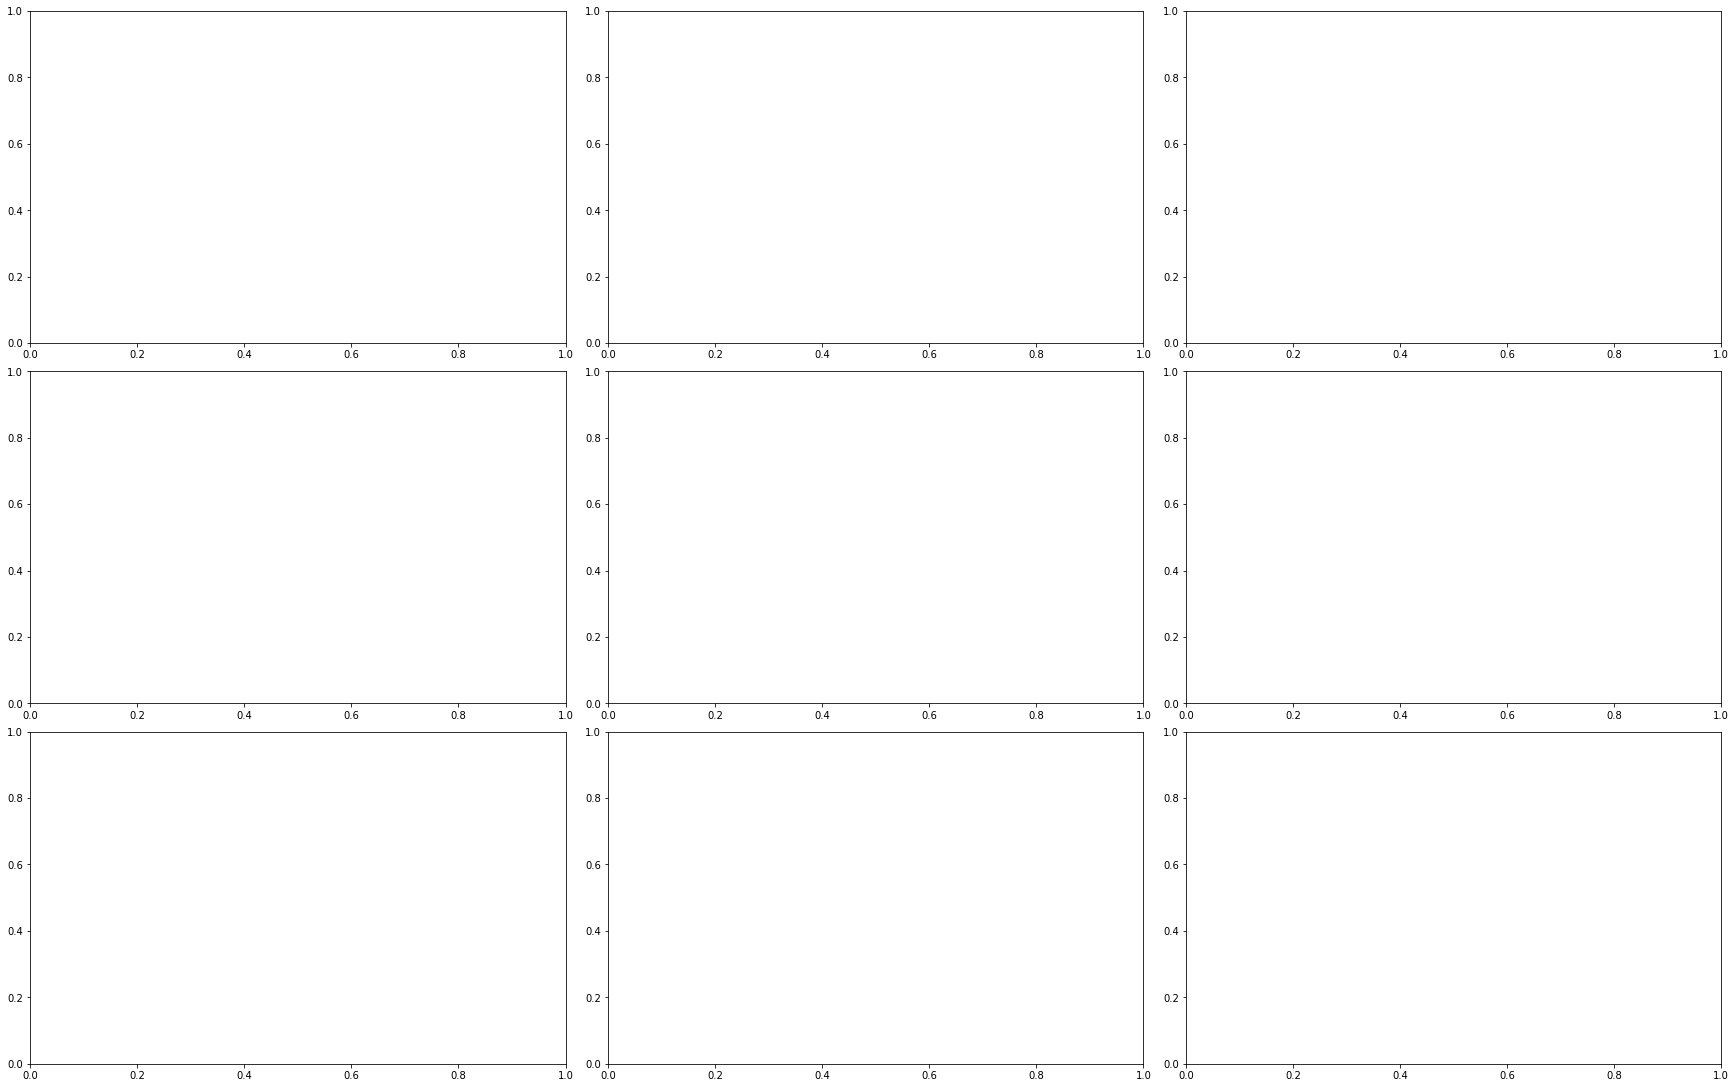

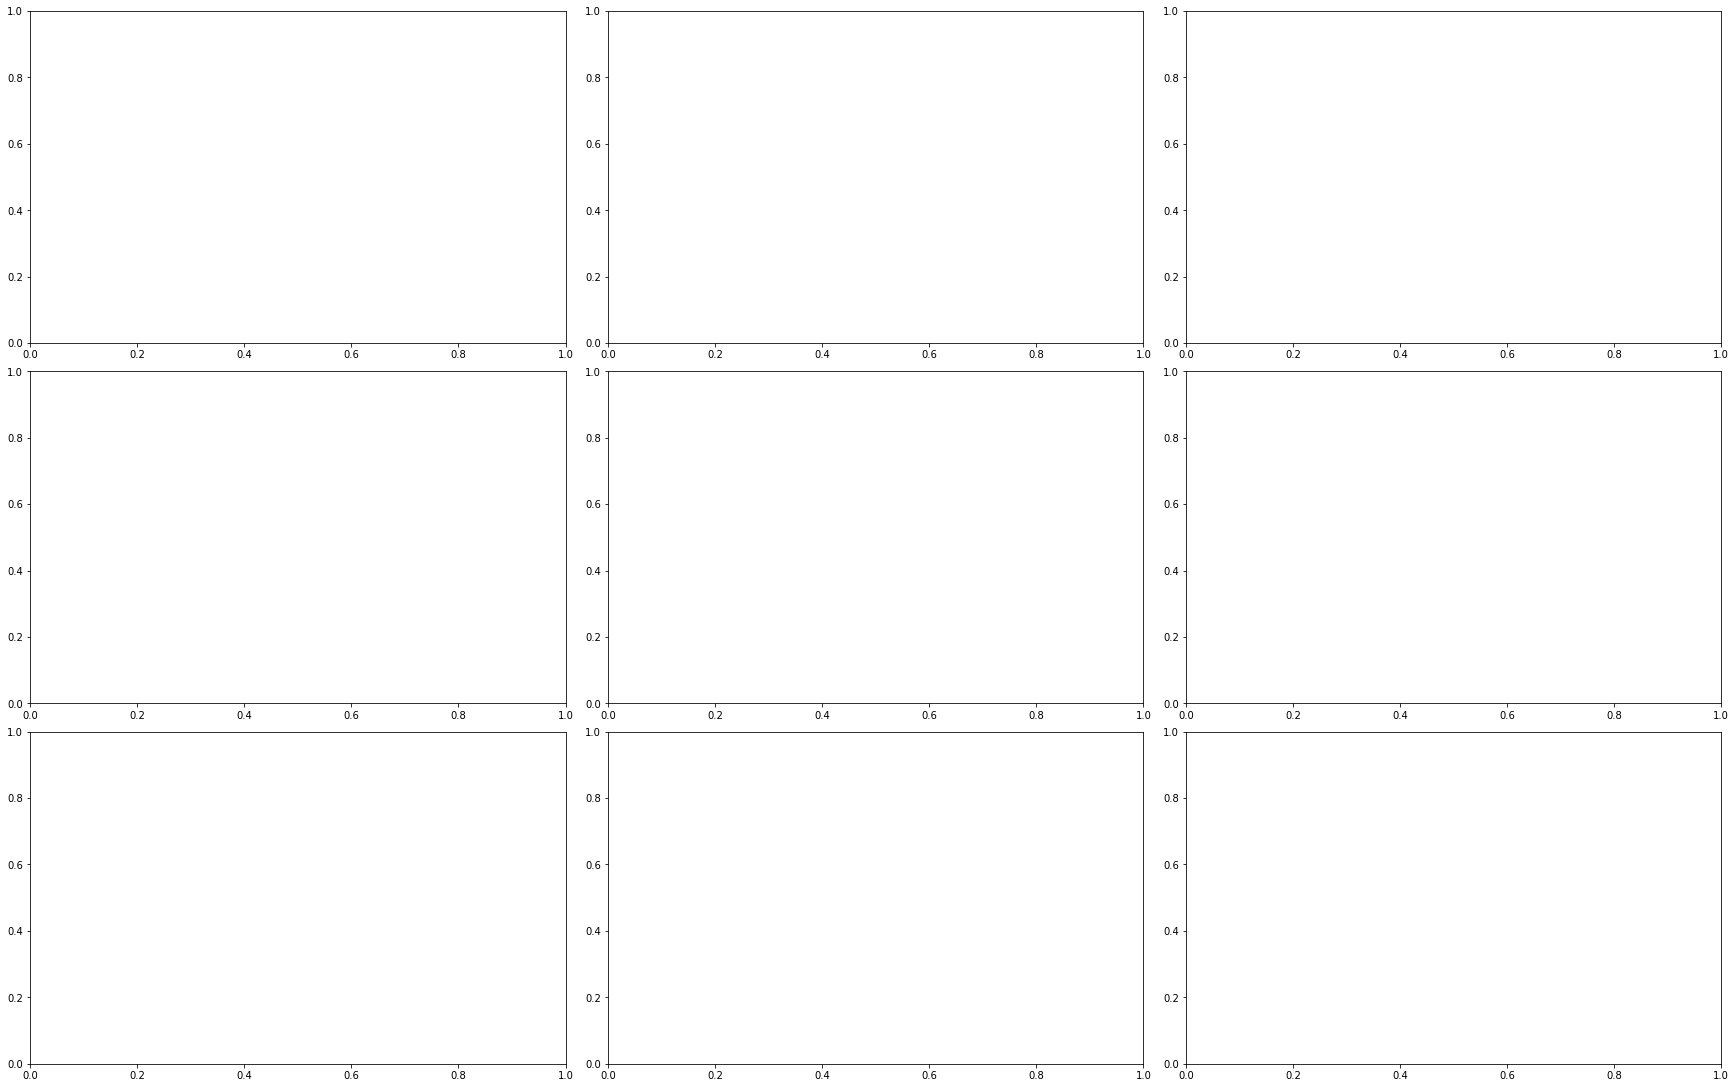

In [5]:
n, iters = 100_000, 1_000

buckets = np.array([5,12,18,30,40,50,60,70])
partitions = [0.058*n, 0.145*n, 0.212*n, 0.364*n, 0.497*n, 0.623*n, 0.759*n, 0.866*n, n]

datas = ['poly','comix1', 'comix2']
models = ['sbm', 'nbinom', 'dpln']
scale1 = 'none'

for data in datas:
    for model in models:
        egos, _,_ = nd_p.fit_to_data(input_file_path=f'input_data/{data}.csv',dist_type=models[0],)
        contact_matrix = np.genfromtxt(f'input_data/contact_matrices/contact_matrix_{data}.csv', delimiter=',')
        if model == 'sbm':
            params=[]
        else:
            params = np.genfromtxt(f'input_data/parameters/params_{data}_{model}.csv', delimiter=',')
        network = nd_p.build_network(n,partitions,contact_matrix,params,model)
        G = nd_p.to_networkx(network=network)
        # Compute the average degree
        degrees = dict(G.degree())
        average_degree = sum(degrees.values()) / float(G.number_of_nodes())

        # Compute the degree assortativity coefficient
        degree_assortativity = nx.degree_assortativity_coefficient(G)

        # Compute the average clustering coefficient
        average_clustering = nx.average_clustering(G)
        
        print(f'egos: ', sum([sum([a*group_sizes[i] for a in row]) for i, row in enumerate(contact_matrix)])/n)
        # Print the results
        print("what it says:", np.mean(network['degrees']))
        print("Average Degree:", average_degree)
        print(network['degrees'][:30])
        # print("Degree Assortativity Coefficient:", degree_assortativity)
        # print("Average Clustering Coefficient:", average_clustering)

In [6]:
sum_d = 0
for person in egos:
    sum_d += person['degree']
print(f'POLYMOD = {sum_d/len(egos)}')

POLYMOD = 13.470400665465132


In [8]:
sum_d = 0
for person in egos:
    sum_d += person['degree']
print(f'CoMix1 = {sum_d/len(egos)}')

CoMix1 = 5.215791541181092


In [10]:
sum_d = 0
for person in egos:
    sum_d += person['degree']
print(f'CoMix2 = {sum_d/len(egos)}')

CoMix2 = 6.75977577867185


### Old things 

In [2]:
datas = ['CoMix_p1', 'CoMix_p2', 'polymod_df']
data_names = ['comix1', 'comix2', 'poly']
models = ['nbinom', 'dpln']
# models = ['sbm']
n = 100_000
buckets = np.array([5,12,18,30,40,50,60,70])
partitions = [0.058*n, 0.145*n, 0.212*n, 0.364*n, 0.497*n, 0.623*n, 0.759*n, 0.866*n, n]
# for i, data in enumerate(datas):
#     for model in models:
#         print(data, model)
#         egos, contact_matrix, params = nd_p.fit_to_data(input_file_path=f'input_data/{data}.csv', save_fig=False, buckets=buckets, dist_type=model)
#         # np.savetxt(f'input_data/egos/egos_{data_names[i]}_{model}.csv', egos, delimiter=',')
#         np.savetxt(f'input_data/parameters/params_{data_names[i]}_{model}.csv', params, delimiter=',')
#     np.savetxt(f'input_data/contact_matrices/contact_matrix_{data_names[i]}.csv', contact_matrix, delimiter=',')
#     # print(egos)
#     with open(f'input_data/egos/egos_{data_names[i]}.json', 'w') as file:
#         json.dump([{'age': a['age'], 'contacts': list(a['contacts']), 'degree': a['degree']} for a in egos], file)


In [3]:
# run code to check fit to data
data = data_names[2]
contact_matrix = np.genfromtxt(f'input_data/contact_matrices/contact_matrix_{data}.csv', delimiter=',')
sims = nd_p.simulate(partitions=partitions, contact_matrix=contact_matrix, network_params=[], tau=0.0106, n=n, dist_type='sbm',inv_gamma=5,prop_infec=1/n)

In [4]:
print(sims.keys())

dict_keys(['infections', 'new_cases', 'final sizes', 'peak time', 'secondary cases by gen', 'degrees by gen', 'tau'])


In [27]:
means, CIs = [], []
for t in range(len(sims['infections'][0])):
    tmp_vals = []
    for age_group in sims['infections']:
        tmp_vals.append(age_group[t])
    means.append(np.mean(tmp_vals))
    CIs.append([np.percentile(tmp_vals, 5), np.percentile(tmp_vals, 95)])

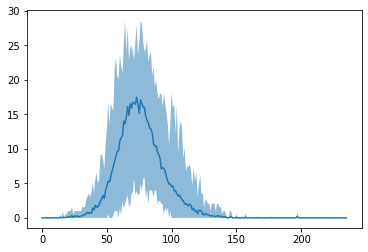

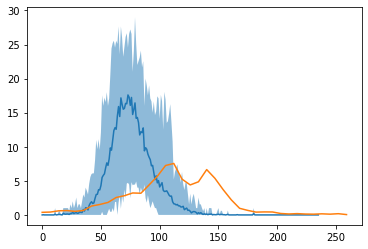

In [36]:
plt.plot(means)
plt.fill_between(list(range(len(means))), [a[0] for a in CIs], [a[1] for a in CIs], alpha=0.5)
plt.show()

## do this for new cases and pick number that go to hosp using binomial
vals, means, CIs = [], [], []
for sim in sims['new_cases']:
    for t, cases in enumerate(sim):
        if t >= len(vals):
            vals.append([])
        vals[t].append(np.random.binomial(cases, 0.01)) 
        
for values in vals: 
    means.append(np.mean(values))
    CIs.append([np.percentile(values, 5), np.percentile(values, 95)])
    
data = pd.read_json('../output_data/fit_to_data/influenza_hospitalisations.json')


plt.plot(means)
plt.fill_between(list(range(len(means))), [a[0] for a in CIs], [a[1] for a in CIs], alpha=0.5)
plt.plot([(a)*7 for a in range(len(data))], data['hospitalisations'])
plt.show()

In [34]:
data

,date,hospitalisations
0,2024-05-13,0.38
1,2024-05-06,0.42
2,2024-04-29,0.60
3,2024-04-22,0.64
4,2024-04-15,0.52
5,2024-04-08,0.65
6,2024-04-01,1.30
7,2024-03-25,1.53
8,2024-03-18,1.83
9,2024-03-11,2.56


In [3]:
n, iters = 100, 1
data_names = ['comix1']
models = ['sbm']
for data in data_names:
    for model in models: 
        # print(f'{data}: {model}')
        contact_matrix = np.genfromtxt(f'input_data/contact_matrices/contact_matrix_{data}.csv', delimiter=',')
        # params = np.genfromtxt(f'input_data/parameters/params_{data}_{model}.csv', delimiter=',')
        # print(params)
        # with open(f'input_data/egos/egos_{data}.json') as f:
        #     egos = json.load(f)
        nd_p.test_r0(partitions=partitions, contact_matrix=contact_matrix, iters=1, n=n, prop_infec=2e-2, r0=3, dist_type=model)